In [4]:
# ANALISIS EXPLORATORIO EDA - LOGISTICS DATASET

from opcode import cmp_op

import pandas
from matplotlib import pyplot as plt

datasetOriginal = pandas.read_csv('C:\\Users\\macam\\OneDrive\\Escritorio\\UPTC\\ESPECIALIZACIÓN\\4. MODELOS ANALITICOS\\logistics_dataset.csv')

print("LOGISTICS DATASET")
datasetOriginal.head()

LOGISTICS DATASET


,item_id,category,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,storage_location_id,...,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,last_restock_date,forecasted_demand_next_7d,KPI_score
0,ITM10000,Pharma,283,21,4,4,49.85,1.56,0.43,L82,...,117.80,1.14,0,0.80,700,3.33,0.33,2024-02-17,184.37,0.556
1,ITM10001,Automotive,301,52,9,6,23.34,2.55,0.69,L15,...,178.80,1.09,3,0.79,736,10.36,0.98,2024-10-01,221.94,0.723
2,ITM10002,Groceries,132,60,11,8,37.69,3.15,0.62,L4,...,54.05,0.95,7,0.75,814,14.32,0.87,2024-04-07,53.85,0.680
3,ITM10003,Automotive,346,46,13,5,33.69,2.79,0.21,L95,...,31.10,1.90,0,0.96,994,2.08,0.29,2024-01-27,92.04,0.488
4,ITM10004,Automotive,49,55,4,6,49.58,5.23,0.31,L36,...,104.97,0.63,5,0.83,299,5.65,0.96,2024-05-17,194.58,0.670


In [5]:
# 1. Verificación de consistencia en los datos
print("ANALISIS COLUMNAS DATASET")
datasetOriginal.info()

# Análisis de consistencia del dataset:
#El dataset contiene 3.204 registros y 23 columnas. Todas las variables tienen datos completos, sin valores nulos. Los tipos de datos son correctos: numéricos (int64, float64) y categóricos (object). La información es consistente y está lista para el análisis exploratorio.

ANALISIS COLUMNAS DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_id                    3204 non-null   object 
 1   category                   3204 non-null   object 
 2   stock_level                3204 non-null   int64  
 3   reorder_point              3204 non-null   int64  
 4   reorder_frequency_days     3204 non-null   int64  
 5   lead_time_days             3204 non-null   int64  
 6   daily_demand               3204 non-null   float64
 7   demand_std_dev             3204 non-null   float64
 8   item_popularity_score      3204 non-null   float64
 9   storage_location_id        3204 non-null   object 
 10  zone                       3204 non-null   object 
 11  picking_time_seconds       3204 non-null   int64  
 12  handling_cost_per_unit     3204 non-null   float64
 13  unit_price            

In [6]:
# Análisis exploratorio de datos numéricos
print("ANALISIS EXPLORATORIO DATOS NUMERICOS")
datasetOriginal.describe()

ANALISIS EXPLORATORIO DATOS NUMERICOS


,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,picking_time_seconds,handling_cost_per_unit,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,forecasted_demand_next_7d,KPI_score
count,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000
mean,263.491573,54.759363,8.507803,5.578340,25.435868,5.260078,0.542325,95.606429,2.777116,105.887575,1.045993,4.602372,0.849738,521.714732,8.123677,0.600581,154.286245,0.601737
std,138.568360,26.053354,3.473229,2.292486,14.038861,2.725639,0.259200,49.218084,1.305213,54.428161,0.550480,2.883708,0.086703,276.768531,4.069191,0.230511,82.945255,0.108286
min,20.000000,10.000000,3.000000,2.000000,1.010000,0.500000,0.100000,10.000000,0.500000,10.220000,0.100000,0.000000,0.700000,50.000000,1.000000,0.200000,10.090000,0.259000
25%,144.000000,32.000000,5.000000,4.000000,13.535000,2.917500,0.310000,53.000000,1.660000,59.760000,0.580000,2.000000,0.780000,283.000000,4.590000,0.400000,83.190000,0.527000
50%,264.000000,55.000000,9.000000,6.000000,25.405000,5.235000,0.540000,96.000000,2.810000,106.005000,1.050000,5.000000,0.850000,513.500000,8.150000,0.600000,152.870000,0.601000
75%,386.000000,78.000000,12.000000,8.000000,37.412500,7.542500,0.760000,138.000000,3.910000,152.410000,1.522500,7.000000,0.920000,764.250000,11.692500,0.800000,225.440000,0.677250
max,499.000000,99.000000,14.000000,9.000000,49.980000,10.000000,1.000000,179.000000,5.000000,200.000000,2.000000,9.000000,1.000000,999.000000,15.000000,1.000000,299.940000,0.936000


In [7]:
# Análisis exploratorio de variables categóricas
print("ANALISIS EXPLORATORIO VARIABLES CATEGORICAS¨")

# Valores únicos de cada columna del dataset
datasetOriginal.apply(pandas.unique)

ANALISIS EXPLORATORIO VARIABLES CATEGORICAS¨


item_id                      [ITM10000, ITM10001, ITM10002, ITM10003, ITM10...
category                     [Pharma, Automotive, Groceries, Apparel, Elect...
stock_level                  [283, 301, 132, 346, 49, 154, 86, 84, 311, 44,...
reorder_point                [21, 52, 60, 46, 55, 62, 97, 89, 22, 98, 63, 6...
reorder_frequency_days               [4, 9, 11, 13, 6, 7, 3, 14, 5, 8, 10, 12]
lead_time_days                                        [4, 6, 8, 5, 9, 2, 7, 3]
daily_demand                 [49.85, 23.34, 37.69, 33.69, 49.58, 35.95, 9.0...
demand_std_dev               [1.56, 2.55, 3.15, 2.79, 5.23, 9.47, 4.72, 6.7...
item_popularity_score        [0.43, 0.69, 0.62, 0.21, 0.31, 0.41, 0.28, 0.2...
storage_location_id          [L82, L15, L4, L95, L36, L32, L29, L18, L14, L...
zone                                                              [B, A, D, C]
picking_time_seconds         [106, 45, 177, 39, 35, 94, 110, 130, 40, 26, 1...
handling_cost_per_unit       [3.61, 3.54, 0.52, 2.64

INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES NUMERICA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   stock_level                3204 non-null   int64  
 1   reorder_point              3204 non-null   int64  
 2   reorder_frequency_days     3204 non-null   int64  
 3   lead_time_days             3204 non-null   int64  
 4   daily_demand               3204 non-null   float64
 5   demand_std_dev             3204 non-null   float64
 6   item_popularity_score      3204 non-null   float64
 7   picking_time_seconds       3204 non-null   int64  
 8   handling_cost_per_unit     3204 non-null   float64
 9   unit_price                 3204 non-null   float64
 10  holding_cost_per_unit_day  3204 non-null   float64
 11  stockout_count_last_month  3204 non-null   int64  
 12  order_fulfillment_rate     3204 non-null 

<Figure size 1500x1000 with 0 Axes>

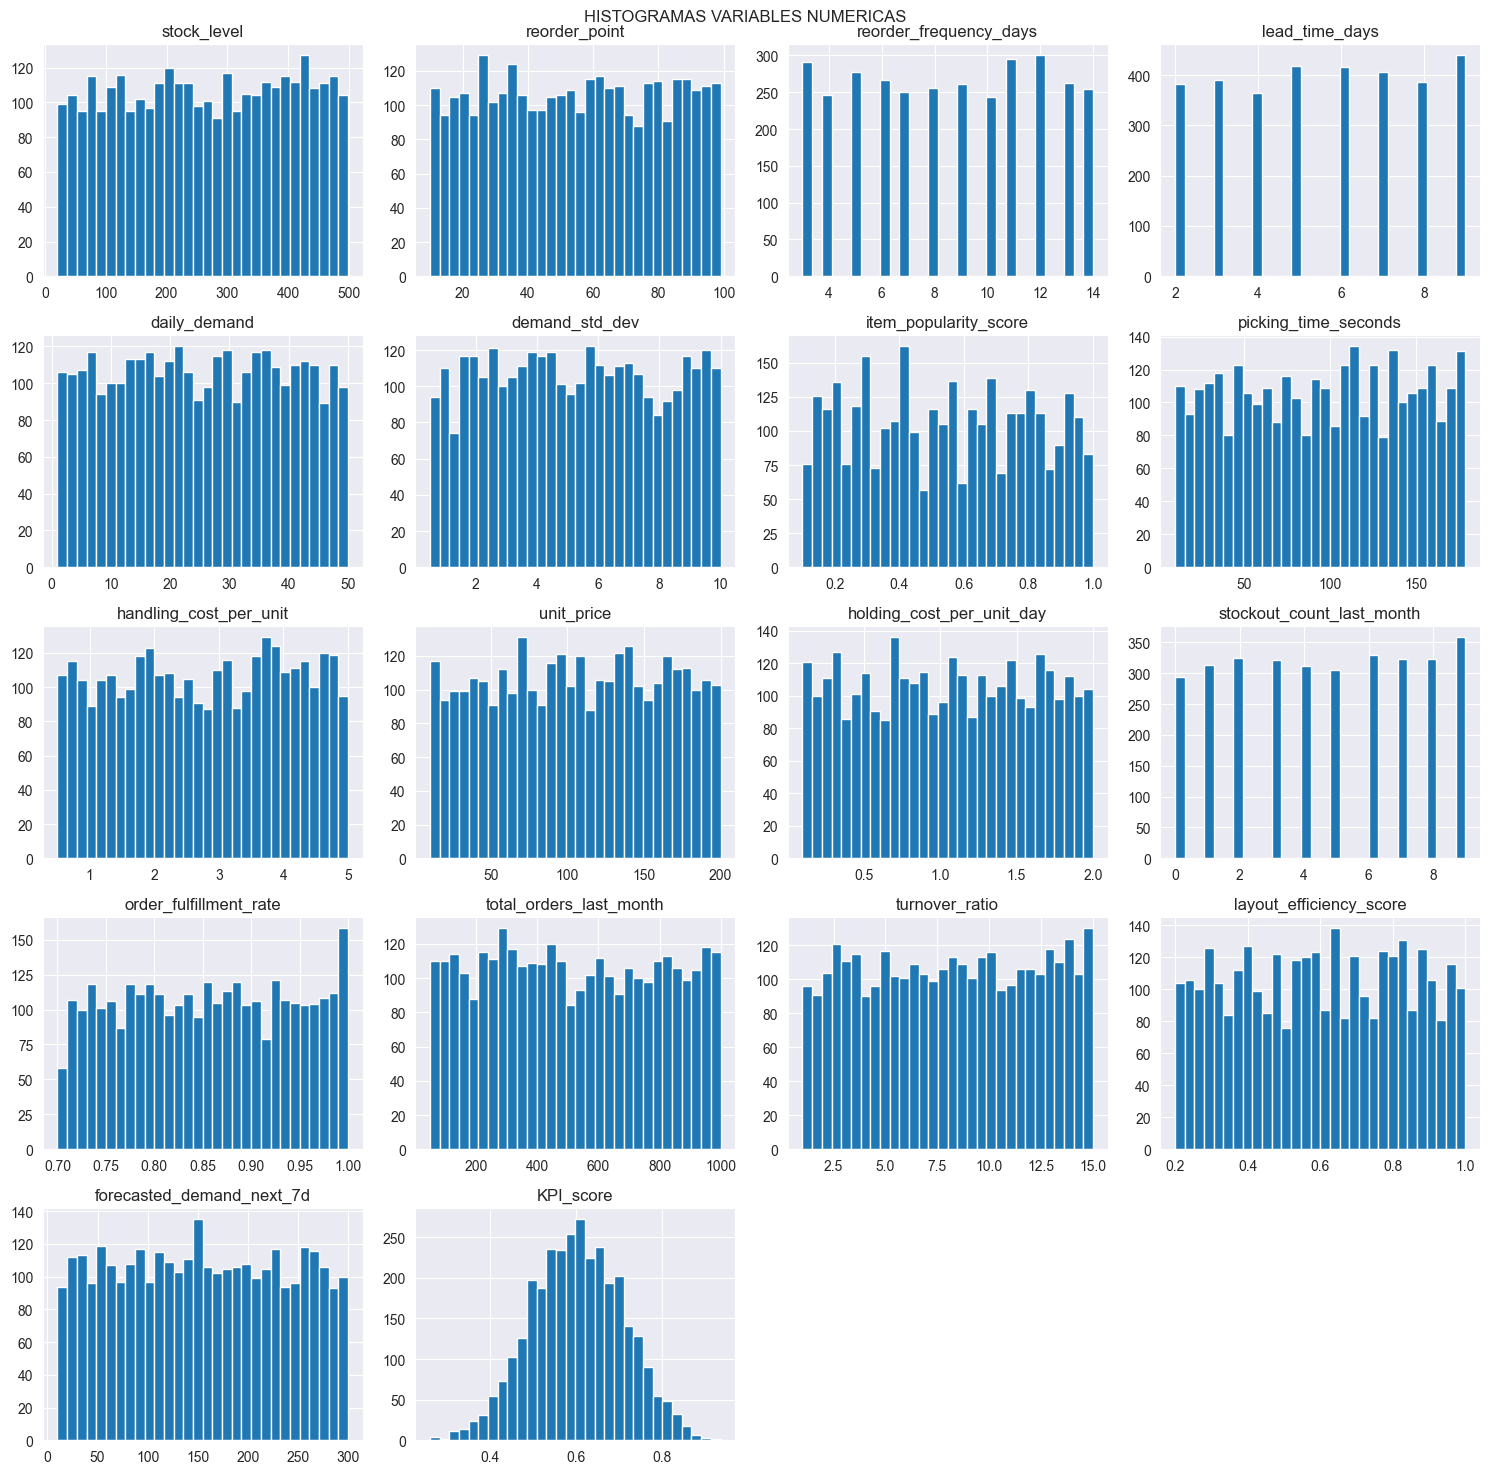

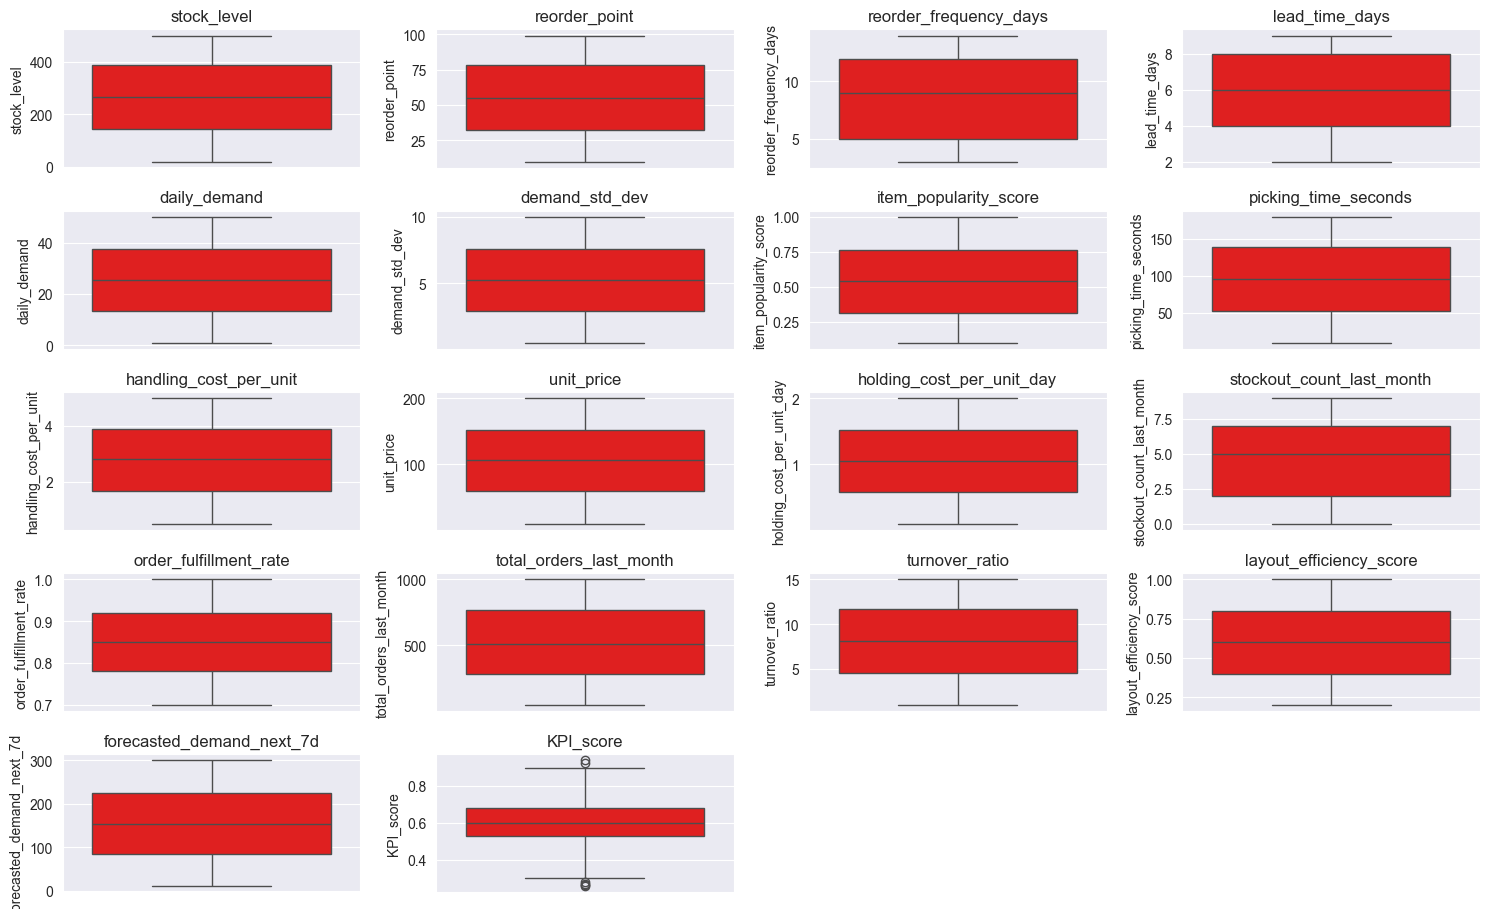

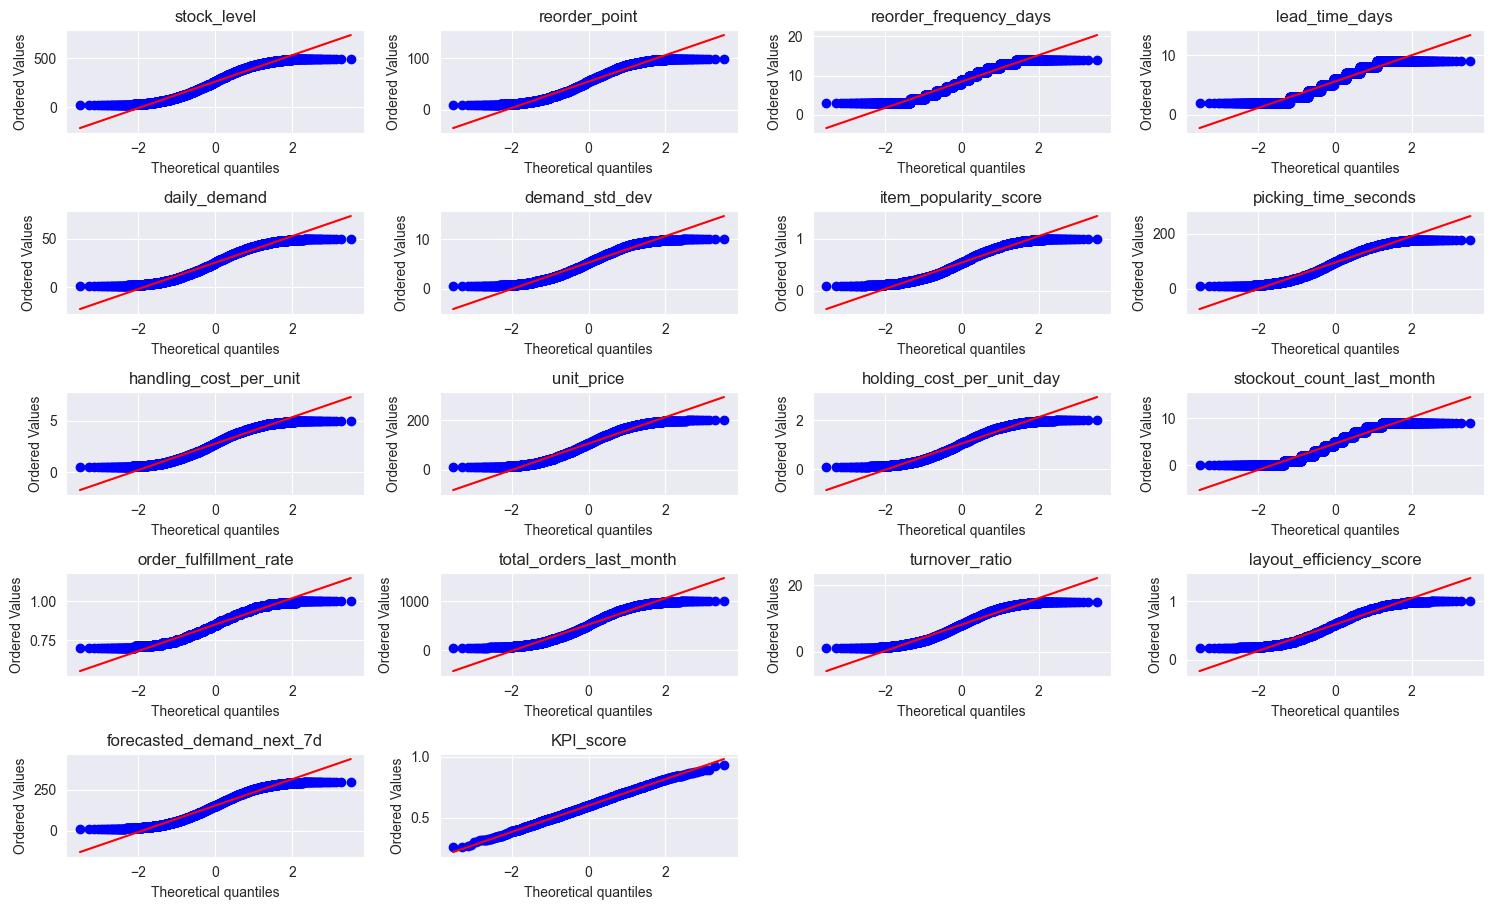

In [8]:
# Interpretación de distribuciones de las variables numéricas
print("INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES NUMERICA")
import numpy
import matplotlib.pyplot as pyplot
import seaborn as sns
import math
import scipy.stats as stats

# Histogramas
datasetOriginalNumberColumns = datasetOriginal.select_dtypes(include=[numpy.number])
datasetOriginalNumberColumns.info()

pyplot.figure(figsize=(15,10))
datasetOriginalNumberColumns.hist(bins = 30, figsize = (15,15))
pyplot.suptitle("HISTOGRAMAS VARIABLES NUMERICAS")
pyplot.tight_layout()
pyplot.show()

# Diagrama de bigotes
numCols = len(datasetOriginalNumberColumns.columns)
cols = 4
rows  = math.ceil(numCols / cols)
pyplot.figure(figsize=(15,10))

for i, column in enumerate(datasetOriginalNumberColumns, 1):
    pyplot.subplot(rows, cols, i)
    sns.boxplot(data = datasetOriginalNumberColumns[column], color = 'red')
    pyplot.title(column)

pyplot.tight_layout(rect=[0, 0.03, 1, 0.95])
pyplot.show()

# QQ Plots
numCols = len(datasetOriginalNumberColumns.columns)
cols = 4
rows  = math.ceil(numCols / cols)
pyplot.figure(figsize=(15,10))

for i, column in enumerate(datasetOriginalNumberColumns, 1):
    pyplot.subplot(rows, cols, i)
    stats.probplot(datasetOriginalNumberColumns[column], plot=pyplot, dist="norm")
    pyplot.title(column)

pyplot.tight_layout(rect=[0, 0.03, 1, 0.95])
pyplot.show()

In [9]:
# Interpretación de las distribuciones de las variables categoricas
print("INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES CATEGORICAS")

datasetOriginal.apply(pandas.unique)

#Interpretación de las distribuciones de las variables categóricas:
#Se identificaron las variables categóricas del dataset y sus posibles usos analíticos.
# Las variables category y zone presentan pocas categorías, por lo que son útiles para comparar el rendimiento logístico entre grupos de productos o zonas operativas.
# Variables como item_id y storage_location_id tienen valores únicos que las identifican, pero no aportan valor analítico directo.
# Finalmente, last_restock_date evidencia fechas de reposición distribuidas durante todo el año 2024, reflejando un proceso de abastecimiento constante.

INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES CATEGORICAS


item_id                      [ITM10000, ITM10001, ITM10002, ITM10003, ITM10...
category                     [Pharma, Automotive, Groceries, Apparel, Elect...
stock_level                  [283, 301, 132, 346, 49, 154, 86, 84, 311, 44,...
reorder_point                [21, 52, 60, 46, 55, 62, 97, 89, 22, 98, 63, 6...
reorder_frequency_days               [4, 9, 11, 13, 6, 7, 3, 14, 5, 8, 10, 12]
lead_time_days                                        [4, 6, 8, 5, 9, 2, 7, 3]
daily_demand                 [49.85, 23.34, 37.69, 33.69, 49.58, 35.95, 9.0...
demand_std_dev               [1.56, 2.55, 3.15, 2.79, 5.23, 9.47, 4.72, 6.7...
item_popularity_score        [0.43, 0.69, 0.62, 0.21, 0.31, 0.41, 0.28, 0.2...
storage_location_id          [L82, L15, L4, L95, L36, L32, L29, L18, L14, L...
zone                                                              [B, A, D, C]
picking_time_seconds         [106, 45, 177, 39, 35, 94, 110, 130, 40, 26, 1...
handling_cost_per_unit       [3.61, 3.54, 0.52, 2.64

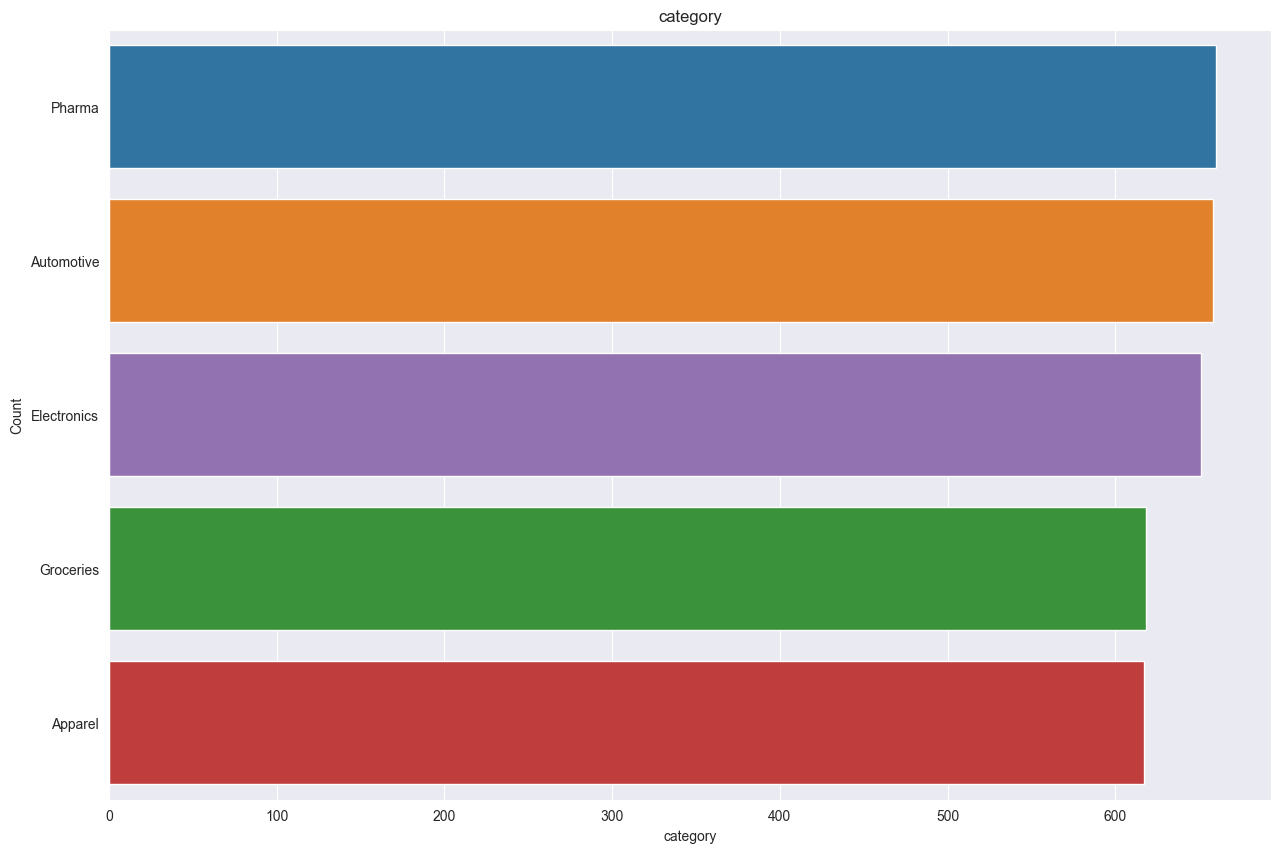

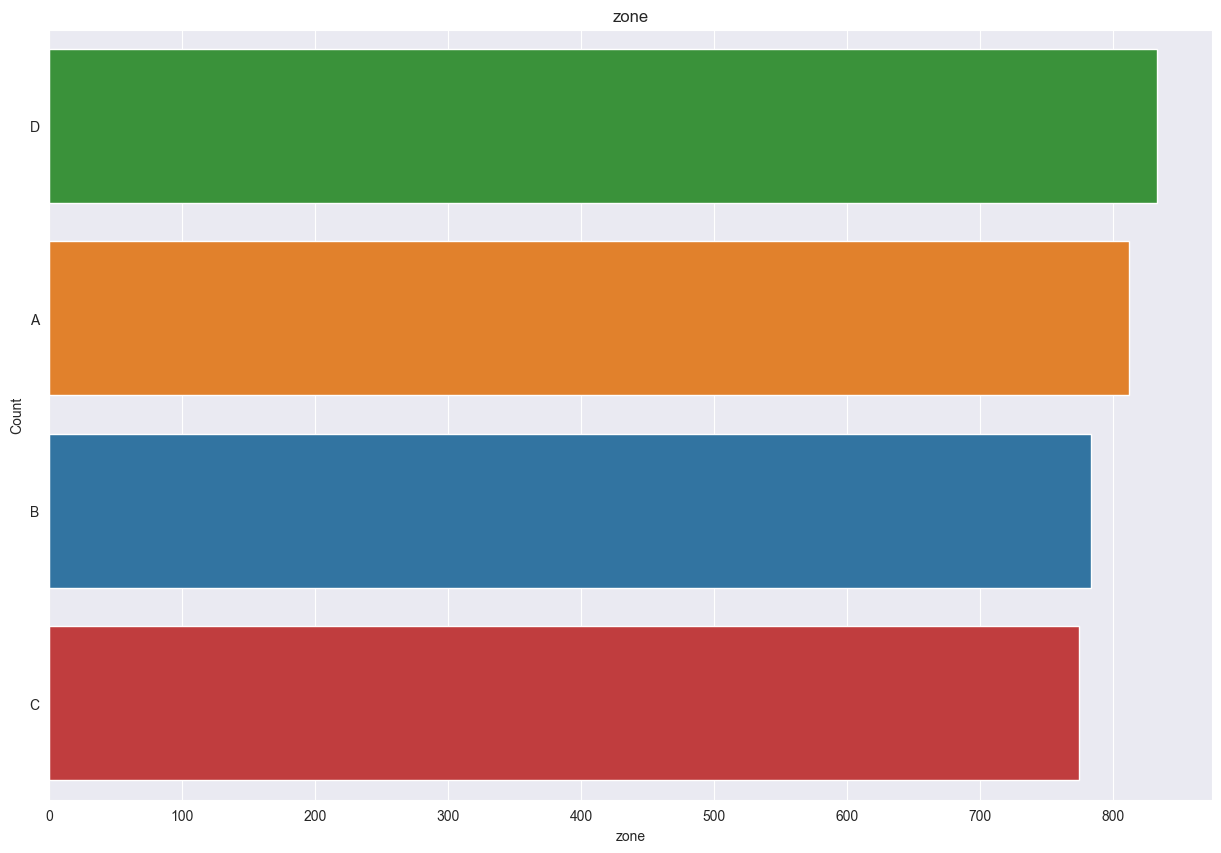

In [10]:
# Eliminando columnas numéricas
datasetOriginalCategoryColumns = datasetOriginal.drop(columns = ['stock_level','reorder_point','reorder_frequency_days','lead_time_days','daily_demand','demand_std_dev','item_popularity_score','picking_time_seconds','handling_cost_per_unit','unit_price','holding_cost_per_unit_day','stockout_count_last_month','order_fulfillment_rate','total_orders_last_month','turnover_ratio','layout_efficiency_score','forecasted_demand_next_7d','KPI_score'])

# Variable categórica 'Category'
pyplot.figure(figsize=(15,10))
sns.countplot(y = datasetOriginal['category'], data = datasetOriginal, order=datasetOriginal['category'].value_counts().index, hue='category', dodge=False)
pyplot.title('category')
pyplot.xlabel('category')
pyplot.ylabel('Count')
pyplot.show()

# Variable categórica 'Zone'
pyplot.figure(figsize=(15,10))
sns.countplot(y = datasetOriginal['zone'], data = datasetOriginal, order=datasetOriginal['zone'].value_counts().index, hue='zone', dodge=False)
pyplot.title('zone')
pyplot.xlabel('zone')
pyplot.ylabel('Count')
pyplot.show()

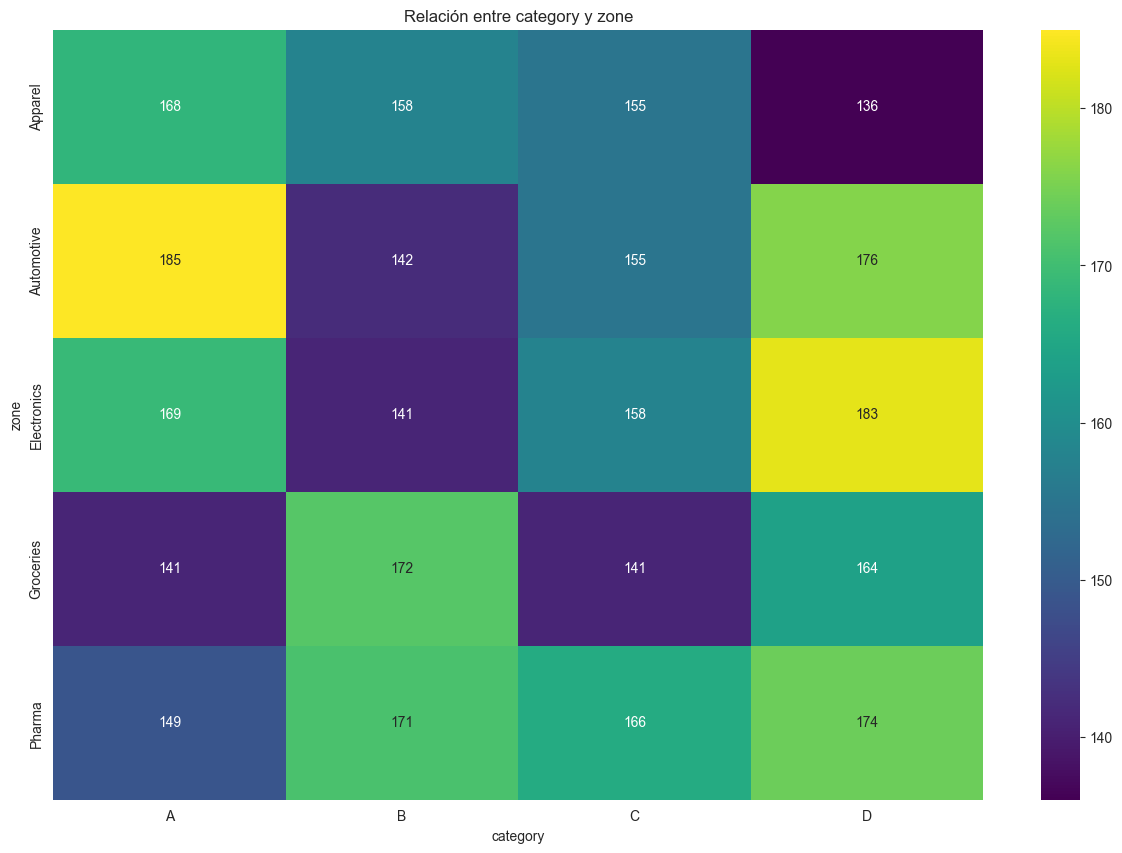

In [11]:
# Contar el numero de similitudes entre 2 columnas
cross_table = pandas.crosstab(datasetOriginalCategoryColumns['category'], datasetOriginalCategoryColumns['zone'])
pyplot.figure(figsize=(15,10))
sns.heatmap(cross_table, annot=True, fmt='d', cmap='viridis')
pyplot.title('Relación entre category y zone')
pyplot.xlabel('category')
pyplot.ylabel('zone')
pyplot.show()

# Interpretación del heatmap:
# Muestra la frecuencia de coincidencias entre 'category' (A–D)
# y 'zone' (Apparel, Automotive, Electronics, Groceries, Pharma).
# Se observa una distribución no uniforme:
# - 'Automotive', 'Electronics' y 'Pharma' son las zonas más activas.
# - Las categorías 'A' y 'D' tienen mayor presencia general.
# - Destacan las combinaciones 'Automotive-A' y 'Electronics-D'.
# Conclusión: existe relación entre 'category' y 'zone',
# indicando que no son variables independientes.

In [12]:
# 2. Revisión de datos faltantes
#       a. Datos nulos
datasetOriginal.isnull().sum()

#NO SE PRESENTAN VALORES NULOS

item_id                      0
category                     0
stock_level                  0
reorder_point                0
reorder_frequency_days       0
lead_time_days               0
daily_demand                 0
demand_std_dev               0
item_popularity_score        0
storage_location_id          0
zone                         0
picking_time_seconds         0
handling_cost_per_unit       0
unit_price                   0
holding_cost_per_unit_day    0
stockout_count_last_month    0
order_fulfillment_rate       0
total_orders_last_month      0
turnover_ratio               0
layout_efficiency_score      0
last_restock_date            0
forecasted_demand_next_7d    0
KPI_score                    0
dtype: int64

In [13]:
# Revisión de datos faltantes por porcentaje %
print("Identificacion de valores nulos por porcentaje")
totalRows = len(datasetOriginal)
missingPercentage = datasetOriginal.isnull().sum() / totalRows * 100
print(missingPercentage)

Identificacion de valores nulos por porcentaje
item_id                      0.0
category                     0.0
stock_level                  0.0
reorder_point                0.0
reorder_frequency_days       0.0
lead_time_days               0.0
daily_demand                 0.0
demand_std_dev               0.0
item_popularity_score        0.0
storage_location_id          0.0
zone                         0.0
picking_time_seconds         0.0
handling_cost_per_unit       0.0
unit_price                   0.0
holding_cost_per_unit_day    0.0
stockout_count_last_month    0.0
order_fulfillment_rate       0.0
total_orders_last_month      0.0
turnover_ratio               0.0
layout_efficiency_score      0.0
last_restock_date            0.0
forecasted_demand_next_7d    0.0
KPI_score                    0.0
dtype: float64


Revision grafica valores nulos


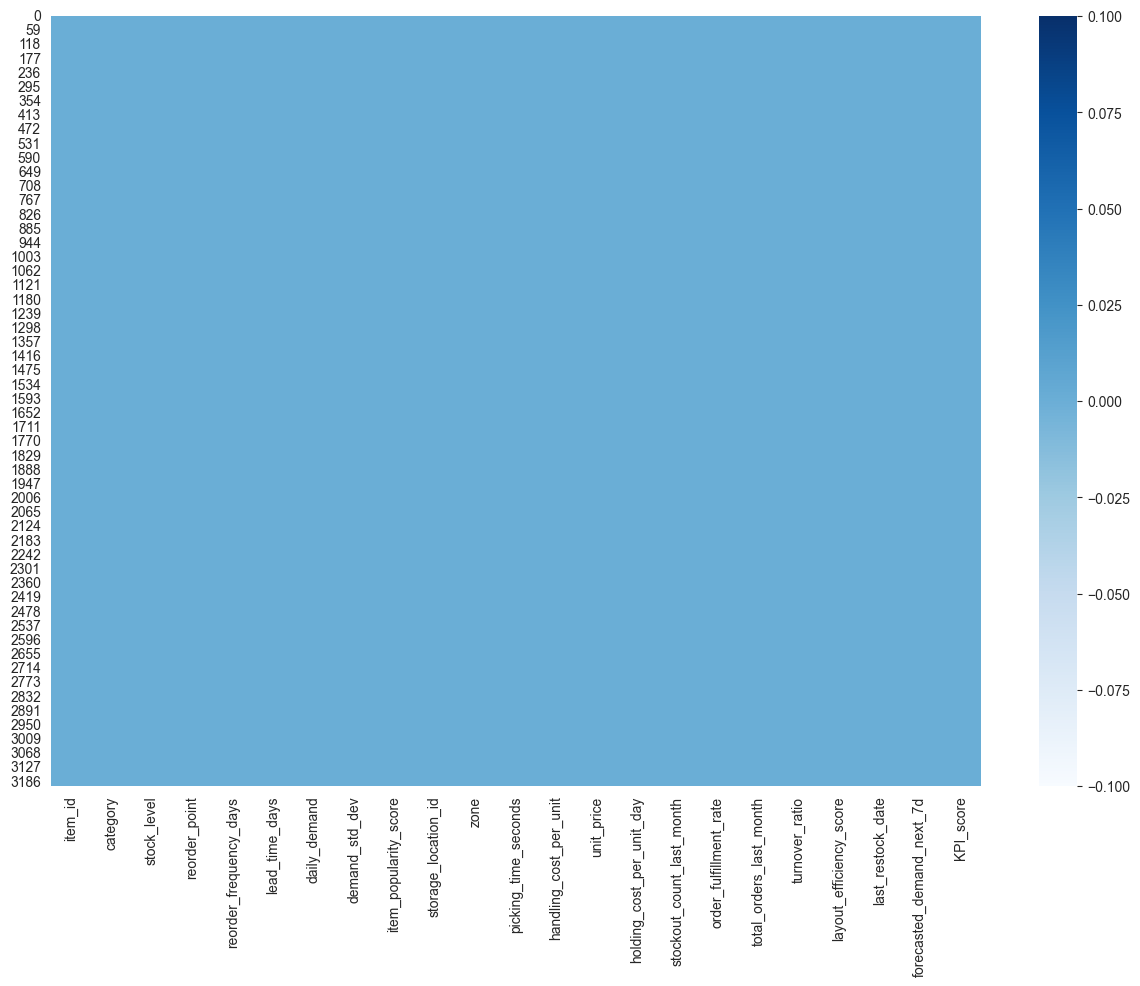

In [14]:
# Revisión de datos faltantes por gráfico
print("Revision grafica valores nulos")
pyplot.figure(figsize=(15,10))
sns.heatmap(datasetOriginal.isnull(), annot=False, cmap='Blues')
pyplot.show()

In [15]:
# Revision datos faltantes
#   b. Manejo de datos faltantes

datasetOriginalClean = datasetOriginal.copy()
datasetOriginalClean.info()

#NO SE PRESENTAN VALORES FALTANTES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_id                    3204 non-null   object 
 1   category                   3204 non-null   object 
 2   stock_level                3204 non-null   int64  
 3   reorder_point              3204 non-null   int64  
 4   reorder_frequency_days     3204 non-null   int64  
 5   lead_time_days             3204 non-null   int64  
 6   daily_demand               3204 non-null   float64
 7   demand_std_dev             3204 non-null   float64
 8   item_popularity_score      3204 non-null   float64
 9   storage_location_id        3204 non-null   object 
 10  zone                       3204 non-null   object 
 11  picking_time_seconds       3204 non-null   int64  
 12  handling_cost_per_unit     3204 non-null   float64
 13  unit_price                 3204 non-null   float

In [16]:
# Eliminar una columna completa
datasetOriginalClean = datasetOriginalClean.drop(columns = ['item_id'])
datasetOriginalClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   category                   3204 non-null   object 
 1   stock_level                3204 non-null   int64  
 2   reorder_point              3204 non-null   int64  
 3   reorder_frequency_days     3204 non-null   int64  
 4   lead_time_days             3204 non-null   int64  
 5   daily_demand               3204 non-null   float64
 6   demand_std_dev             3204 non-null   float64
 7   item_popularity_score      3204 non-null   float64
 8   storage_location_id        3204 non-null   object 
 9   zone                       3204 non-null   object 
 10  picking_time_seconds       3204 non-null   int64  
 11  handling_cost_per_unit     3204 non-null   float64
 12  unit_price                 3204 non-null   float64
 13  holding_cost_per_unit_day  3204 non-null   float

In [17]:
# Eliminar filas que contengan valores nulos o faltantes
datasetOriginalClean = datasetOriginal.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_id                    3204 non-null   object 
 1   category                   3204 non-null   object 
 2   stock_level                3204 non-null   int64  
 3   reorder_point              3204 non-null   int64  
 4   reorder_frequency_days     3204 non-null   int64  
 5   lead_time_days             3204 non-null   int64  
 6   daily_demand               3204 non-null   float64
 7   demand_std_dev             3204 non-null   float64
 8   item_popularity_score      3204 non-null   float64
 9   storage_location_id        3204 non-null   object 
 10  zone                       3204 non-null   object 
 11  picking_time_seconds       3204 non-null   int64  
 12  handling_cost_per_unit     3204 non-null   float64
 13  unit_price                 3204 non-null   float

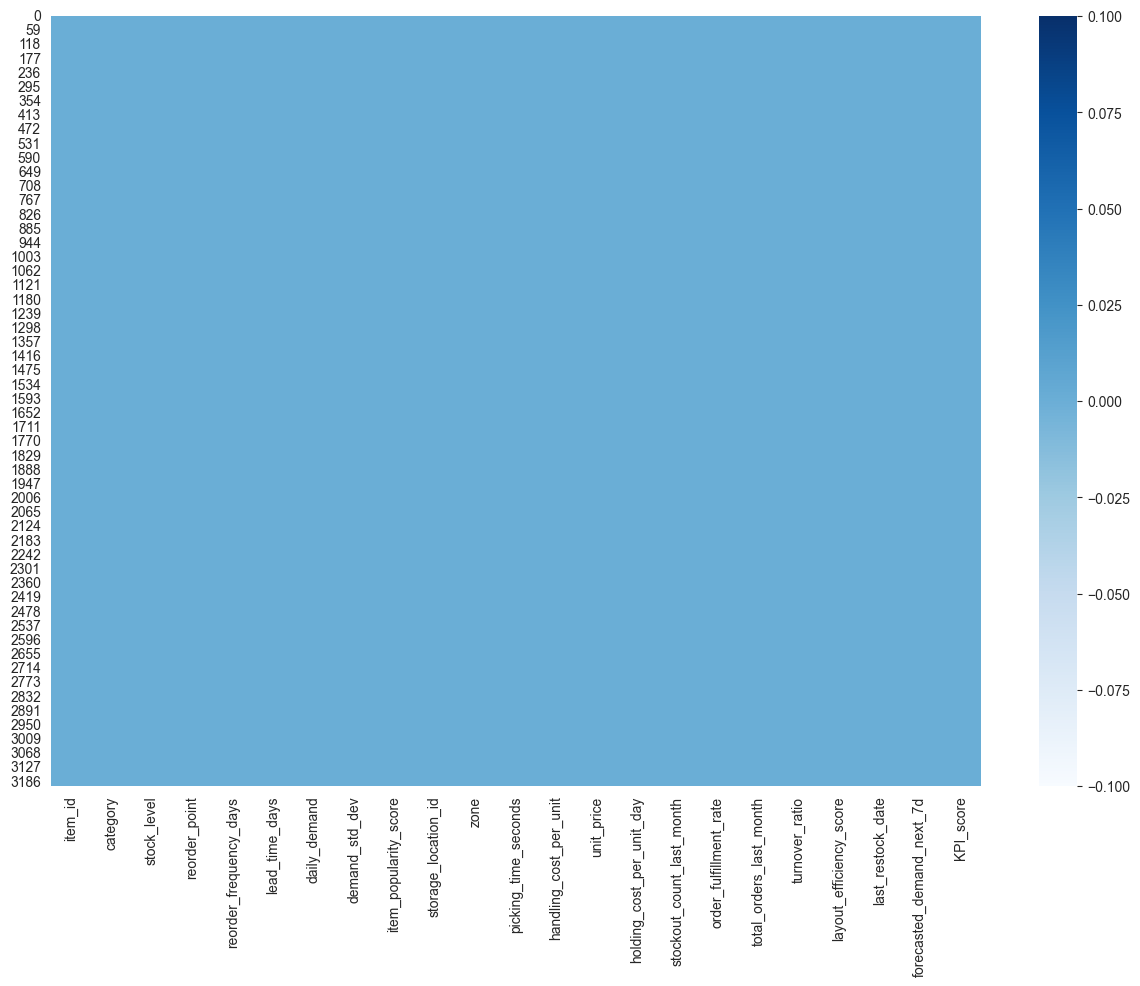

In [18]:
# Cambios en el dataset luego de limpieza
datasetOriginalClean.info()
totalRows = len(datasetOriginal)
totalRowsClean = len(datasetOriginalClean)
totalCleanPercentage = 100 - totalRowsClean / totalRows * 100
print("Diferencia de filas despues de la limpieza del dataset completo: ",  (totalRows - totalRowsClean))
print("Diferencia de filas en porcentaje despues de la limpieza del dataset completo: ",  totalCleanPercentage)
print("Revision grafica valores nulos")
pyplot.figure(figsize=(15,10))
sns.heatmap(datasetOriginalClean.isnull(), annot=False, cmap='Blues')
pyplot.show()

# No se eliminaron filas (0 de diferencia, 0% de pérdida de datos).
# El heatmap confirma que no existen valores nulos.

In [19]:
# Eliminar filas con valores nulos en una columna especifica
datasetOriginalCleanColumns = datasetOriginal.drop(columns = ['item_id'])
datasetOriginalCleanColumns = datasetOriginalCleanColumns.dropna(subset=['forecasted_demand_next_7d'])
datasetOriginalCleanColumns.isnull().sum()

# Eliminación de filas con valores nulos en 'forecasted_demand_next_7d':
# Se eliminaron posibles registros incompletos en esta columna.
# Verificación posterior muestra 0 valores nulos en todo el dataset limpio.

category                     0
stock_level                  0
reorder_point                0
reorder_frequency_days       0
lead_time_days               0
daily_demand                 0
demand_std_dev               0
item_popularity_score        0
storage_location_id          0
zone                         0
picking_time_seconds         0
handling_cost_per_unit       0
unit_price                   0
holding_cost_per_unit_day    0
stockout_count_last_month    0
order_fulfillment_rate       0
total_orders_last_month      0
turnover_ratio               0
layout_efficiency_score      0
last_restock_date            0
forecasted_demand_next_7d    0
KPI_score                    0
dtype: int64

Diferencia de filas despues de la limpieza del dataset completo:  0
Diferencia de filas en porcentaje despues de la limpieza del dataset completo:  0.0


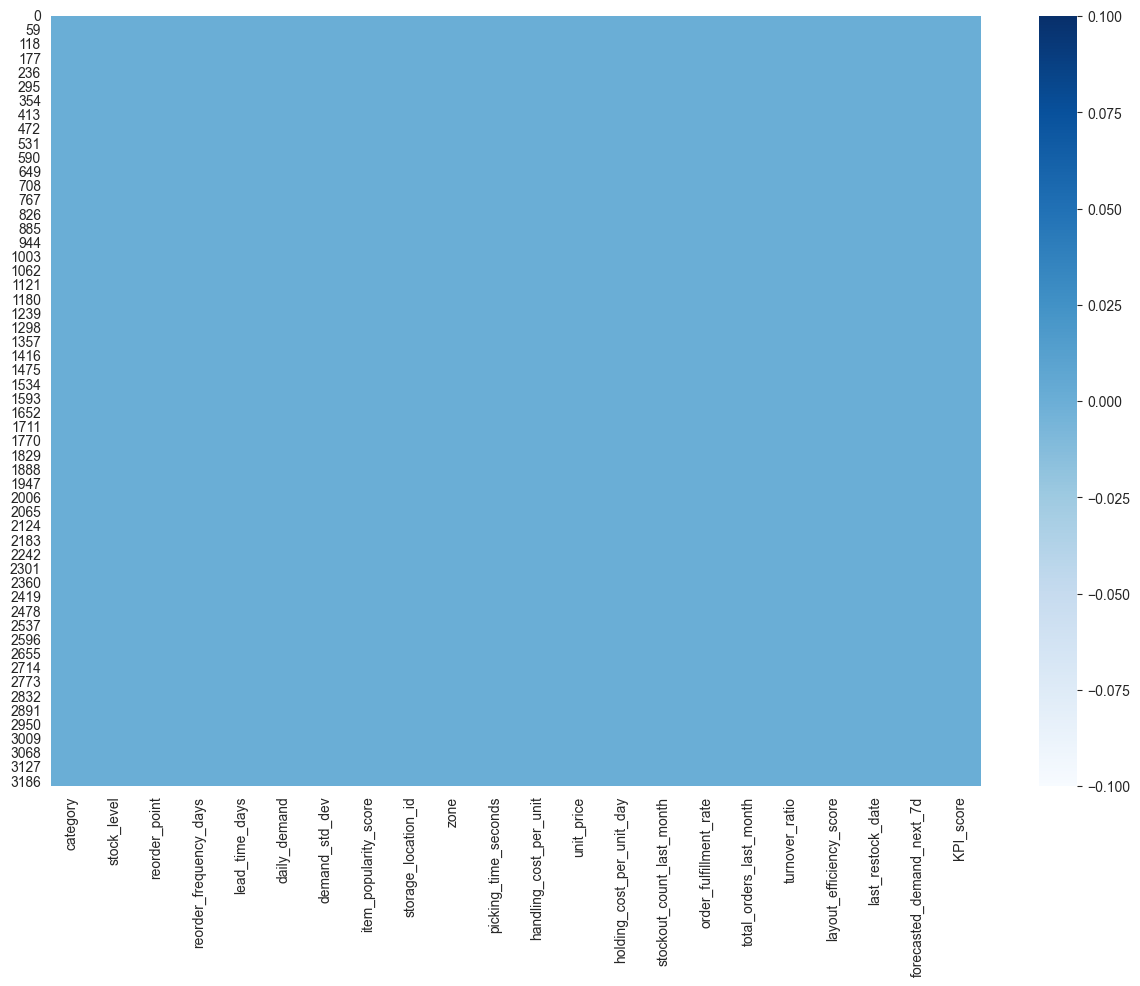

In [20]:
# Verificación final de limpieza:
totalRows = len(datasetOriginal)
totalRowsClean = len(datasetOriginalCleanColumns)
totalCleanPercentage = 100 - totalRowsClean / totalRows * 100
print("Diferencia de filas despues de la limpieza del dataset completo: ",  (totalRows - totalRowsClean))
print("Diferencia de filas en porcentaje despues de la limpieza del dataset completo: ",  totalCleanPercentage)

pyplot.figure(figsize=(15,10))
sns.heatmap(datasetOriginalCleanColumns.isnull(), annot=False, cmap='Blues')
pyplot.show()

# No se eliminaron filas (0 de diferencia, 0% de pérdida de datos).
# El heatmap confirma que no existen valores nulos en el dataset final.

In [21]:
# Limpieza condicional por columnas:
for col in datasetOriginalCleanColumns.columns:
    null_rows = datasetOriginalCleanColumns[datasetOriginalCleanColumns[col].isna()]
    porcetageDelete = int(len(null_rows[col]) * 0.1)
    if porcetageDelete > 0:
        rowsDelete = null_rows.sample(n=porcetageDelete, random_state=50).index
        datasetOriginalCleanColumns.drop(index=rowsDelete, inplace=True)

datasetOriginalCleanColumns.isnull().sum()

# Se verificó si existían valores nulos y se eliminaría un 10% de ellos de forma aleatoria.
# No se encontraron valores faltantes, por lo tanto, no se eliminó ninguna fila.
# El dataset permanece completo y limpio.

category                     0
stock_level                  0
reorder_point                0
reorder_frequency_days       0
lead_time_days               0
daily_demand                 0
demand_std_dev               0
item_popularity_score        0
storage_location_id          0
zone                         0
picking_time_seconds         0
handling_cost_per_unit       0
unit_price                   0
holding_cost_per_unit_day    0
stockout_count_last_month    0
order_fulfillment_rate       0
total_orders_last_month      0
turnover_ratio               0
layout_efficiency_score      0
last_restock_date            0
forecasted_demand_next_7d    0
KPI_score                    0
dtype: int64

Total de filas:  3204
Diferencia de filas despues de la limpieza del dataset completo:  0
Diferencia de filas en porcentaje despues de la limpieza del dataset completo:  0.0


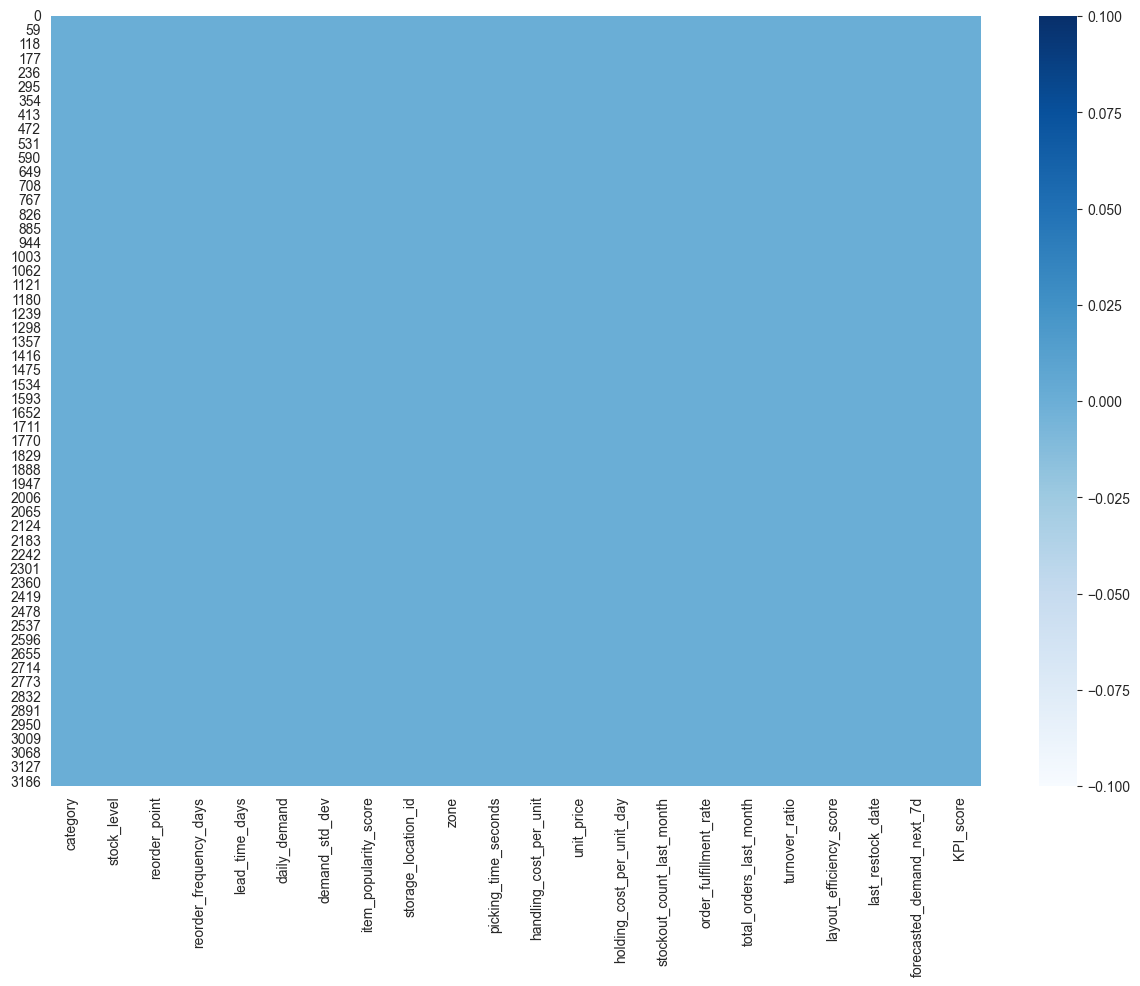

In [22]:
# Manejo de valores faltantes
datasetOriginalCleanColumns['stock_level'] = datasetOriginalCleanColumns['stock_level'].fillna(datasetOriginalCleanColumns['stock_level'].mean())
datasetOriginalCleanColumns['daily_demand'] = datasetOriginalCleanColumns['daily_demand'].fillna(datasetOriginalCleanColumns['daily_demand'].mean())
datasetOriginalCleanColumns['turnover_ratio'] = datasetOriginalCleanColumns['turnover_ratio'].fillna(datasetOriginalCleanColumns['turnover_ratio'].mean())
datasetOriginalCleanColumns['handling_cost_per_unit'] = datasetOriginalCleanColumns['handling_cost_per_unit'].fillna(datasetOriginalCleanColumns['handling_cost_per_unit'].mean())
datasetOriginalCleanColumns['forecasted_demand_next_7d'] = datasetOriginalCleanColumns['forecasted_demand_next_7d'].fillna(datasetOriginalCleanColumns['forecasted_demand_next_7d'].mean())

totalRows = len(datasetOriginal)
totalRowsCleanColumns = len(datasetOriginalCleanColumns)
totalRowsClean = len(datasetOriginalCleanColumns)
totalCleanPercentage = 100 - totalRowsClean / totalRows * 100
print("Total de filas: ",  totalRowsCleanColumns)
print("Diferencia de filas despues de la limpieza del dataset completo: ",  (totalRows - totalRowsClean))
print("Diferencia de filas en porcentaje despues de la limpieza del dataset completo: ",  totalCleanPercentage)

pyplot.figure(figsize=(15,10))
sns.heatmap(datasetOriginalCleanColumns.isnull(), annot=False, cmap='Blues')
pyplot.show()

# Se reemplazaron valores nulos (si existieran) con la media de cada variable numérica.
# No se eliminaron filas; el dataset se mantiene completo y consistente.

In [23]:
# Creación del dataset final:
datasetOriginalFinal = datasetOriginalCleanColumns.drop(columns = ['storage_location_id'])
datasetOriginalFinal.isnull().sum()

# Se eliminó la columna 'storage_location_id' por ser un identificador sin valor analítico.
# No se presentan valores nulos; el dataset final está limpio y preparado para el modelado.

category                     0
stock_level                  0
reorder_point                0
reorder_frequency_days       0
lead_time_days               0
daily_demand                 0
demand_std_dev               0
item_popularity_score        0
zone                         0
picking_time_seconds         0
handling_cost_per_unit       0
unit_price                   0
holding_cost_per_unit_day    0
stockout_count_last_month    0
order_fulfillment_rate       0
total_orders_last_month      0
turnover_ratio               0
layout_efficiency_score      0
last_restock_date            0
forecasted_demand_next_7d    0
KPI_score                    0
dtype: int64

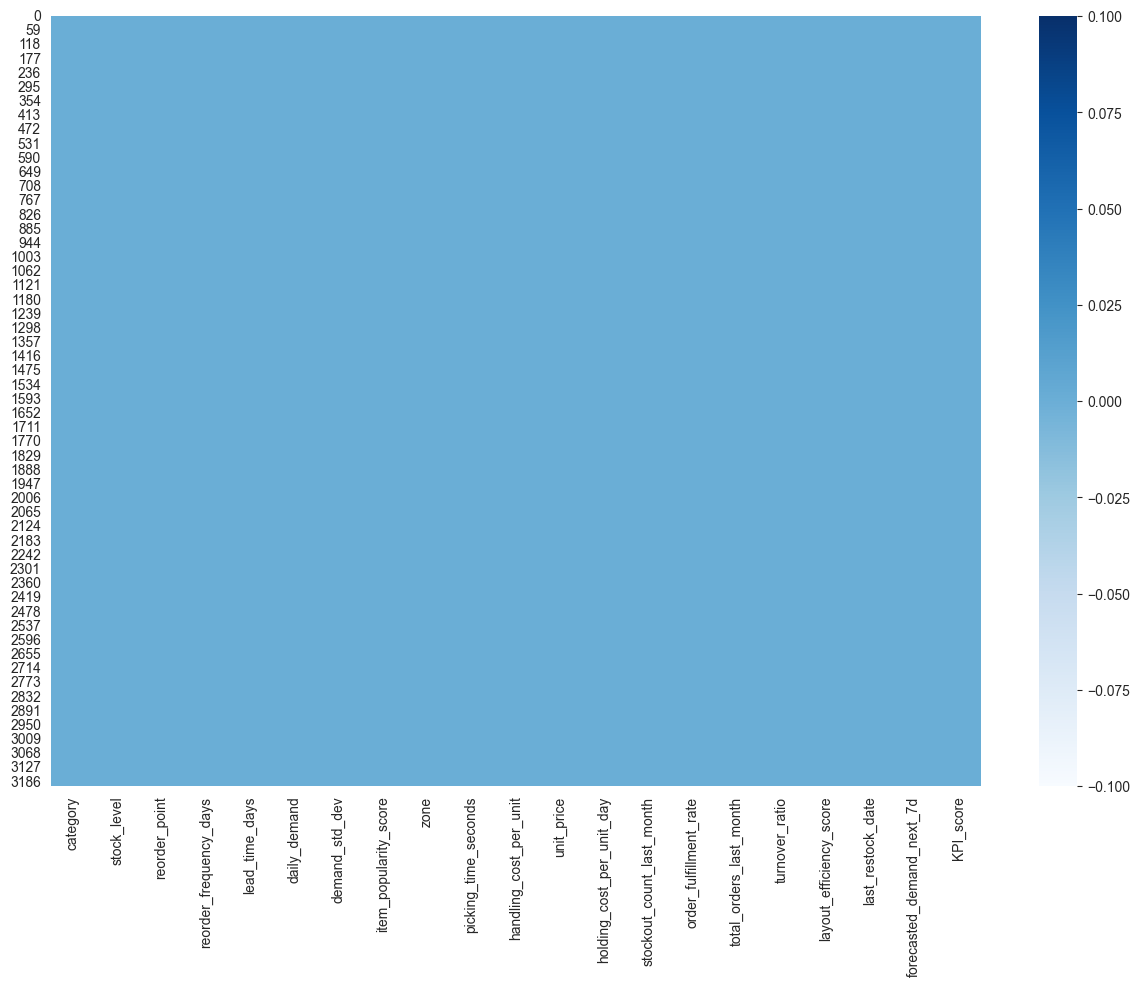

In [24]:
# Dataset final
pyplot.figure(figsize=(15,10))
sns.heatmap(datasetOriginalFinal.isnull(), annot=False, cmap='Blues')
pyplot.show()

In [25]:
# 3. Manejo de duplicados

# Verificar si existen datos duplicados dentro de una columna:
valorDuplicadoColumna = datasetOriginalFinal.duplicated(subset=['item_popularity_score']).sum()
print("Duplicados de columnas: ", valorDuplicadoColumna)

# Verificar filas duplicadas
filasDuplicadas = datasetOriginalFinal.duplicated().sum()
print("Duplicados de filas: ", filasDuplicadas)

# Se encontraron valores repetidos en la columna 'item_popularity_score', lo cual es normal por su naturaleza numérica.
# No se identificaron filas duplicadas en el dataset.

Duplicados de columnas:  3113
Duplicados de filas:  0


In [26]:
# 4. Codificación de variables categóricas
datasetOriginalFinal.head()

,category,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,zone,picking_time_seconds,...,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,last_restock_date,forecasted_demand_next_7d,KPI_score
0,Pharma,283,21,4,4,49.85,1.56,0.43,B,106,...,117.80,1.14,0,0.80,700,3.33,0.33,2024-02-17,184.37,0.556
1,Automotive,301,52,9,6,23.34,2.55,0.69,A,45,...,178.80,1.09,3,0.79,736,10.36,0.98,2024-10-01,221.94,0.723
2,Groceries,132,60,11,8,37.69,3.15,0.62,B,177,...,54.05,0.95,7,0.75,814,14.32,0.87,2024-04-07,53.85,0.680
3,Automotive,346,46,13,5,33.69,2.79,0.21,A,39,...,31.10,1.90,0,0.96,994,2.08,0.29,2024-01-27,92.04,0.488
4,Automotive,49,55,4,6,49.58,5.23,0.31,D,35,...,104.97,0.63,5,0.83,299,5.65,0.96,2024-05-17,194.58,0.670


<Figure size 1500x1000 with 0 Axes>

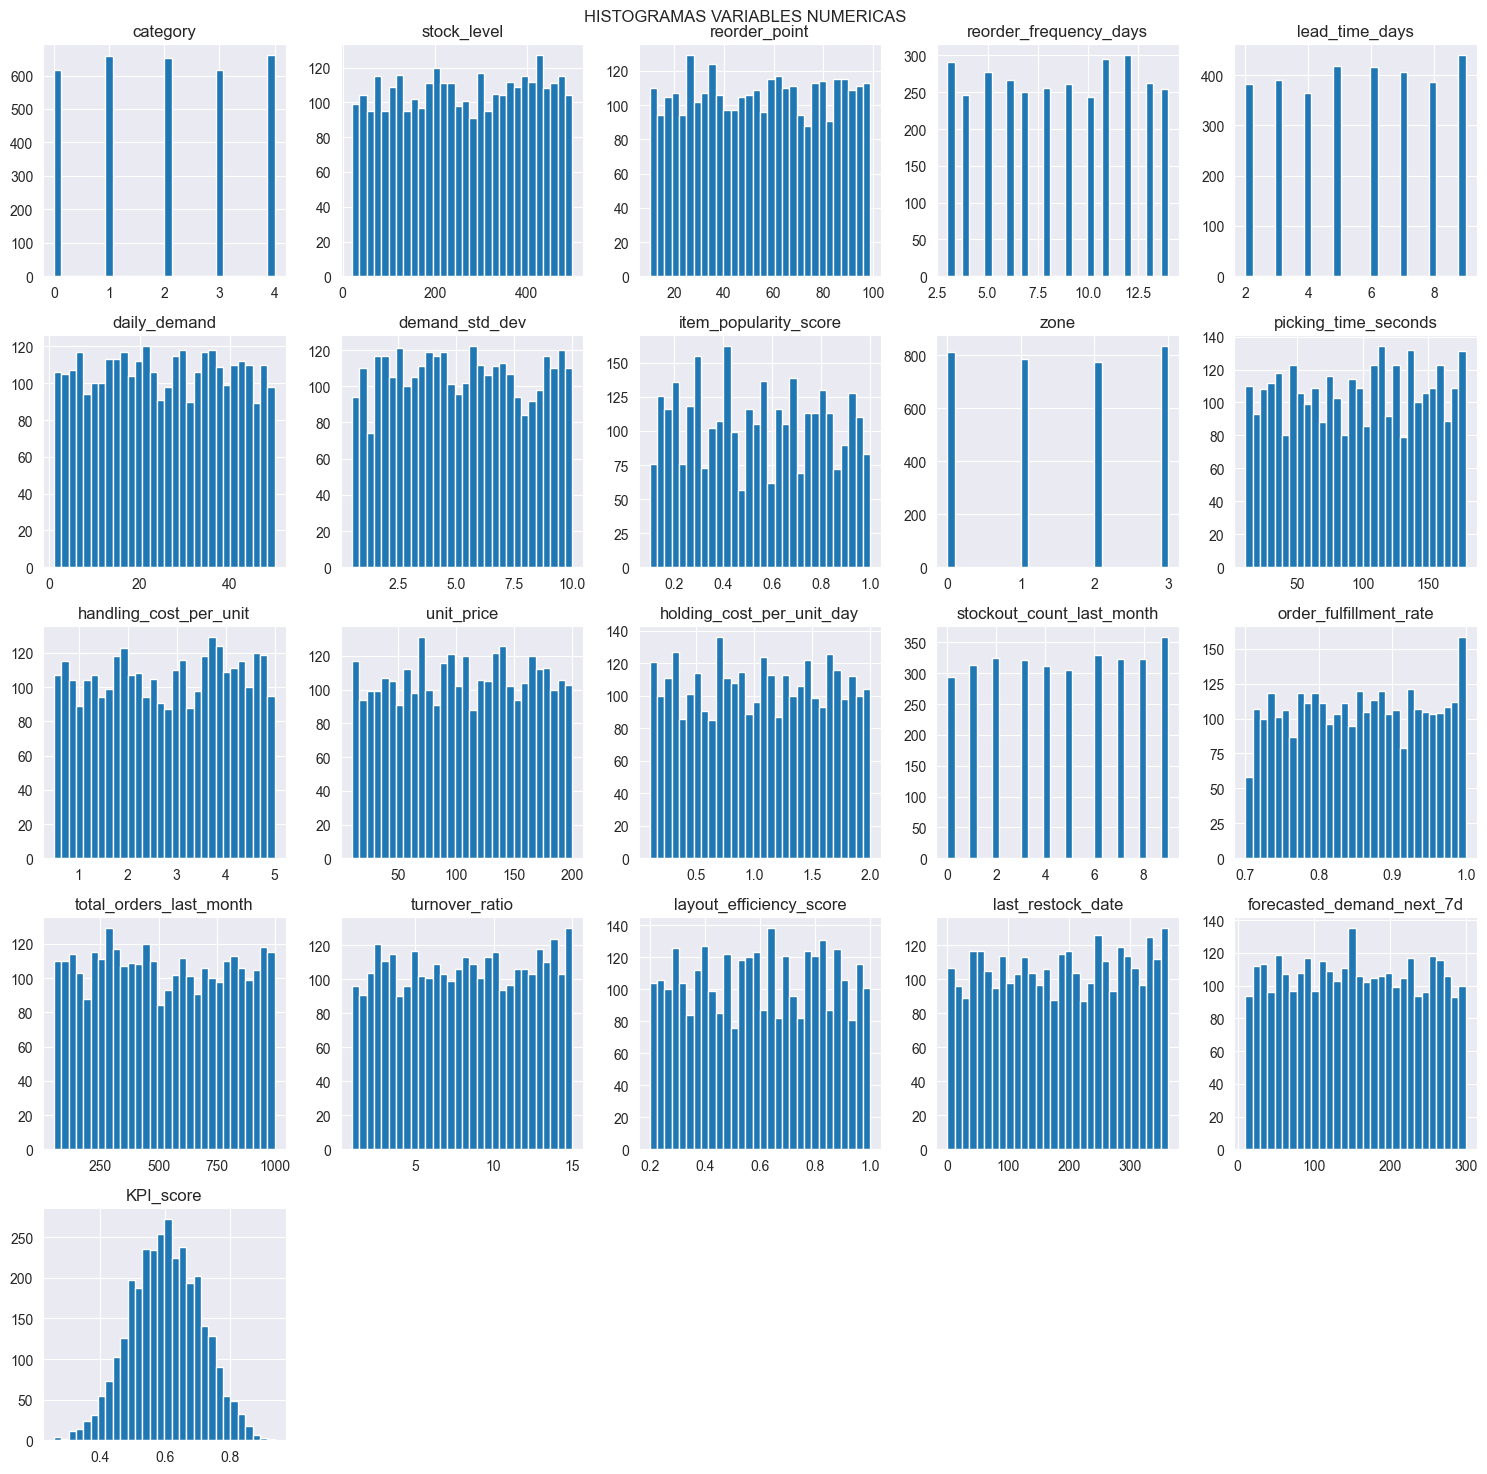

In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
datasetOriginalFinal['category'] = encoder.fit_transform(datasetOriginalFinal['category'])
datasetOriginalFinal['zone'] = encoder.fit_transform(datasetOriginalFinal['zone'])
datasetOriginalFinal['last_restock_date'] = encoder.fit_transform(datasetOriginalFinal['last_restock_date'])

datasetOriginalFinal.head()

pyplot.figure(figsize=(15,10))
datasetOriginalFinal.hist(bins = 30, figsize = (15,15))
pyplot.suptitle("HISTOGRAMAS VARIABLES NUMERICAS")
pyplot.tight_layout()
pyplot.show()

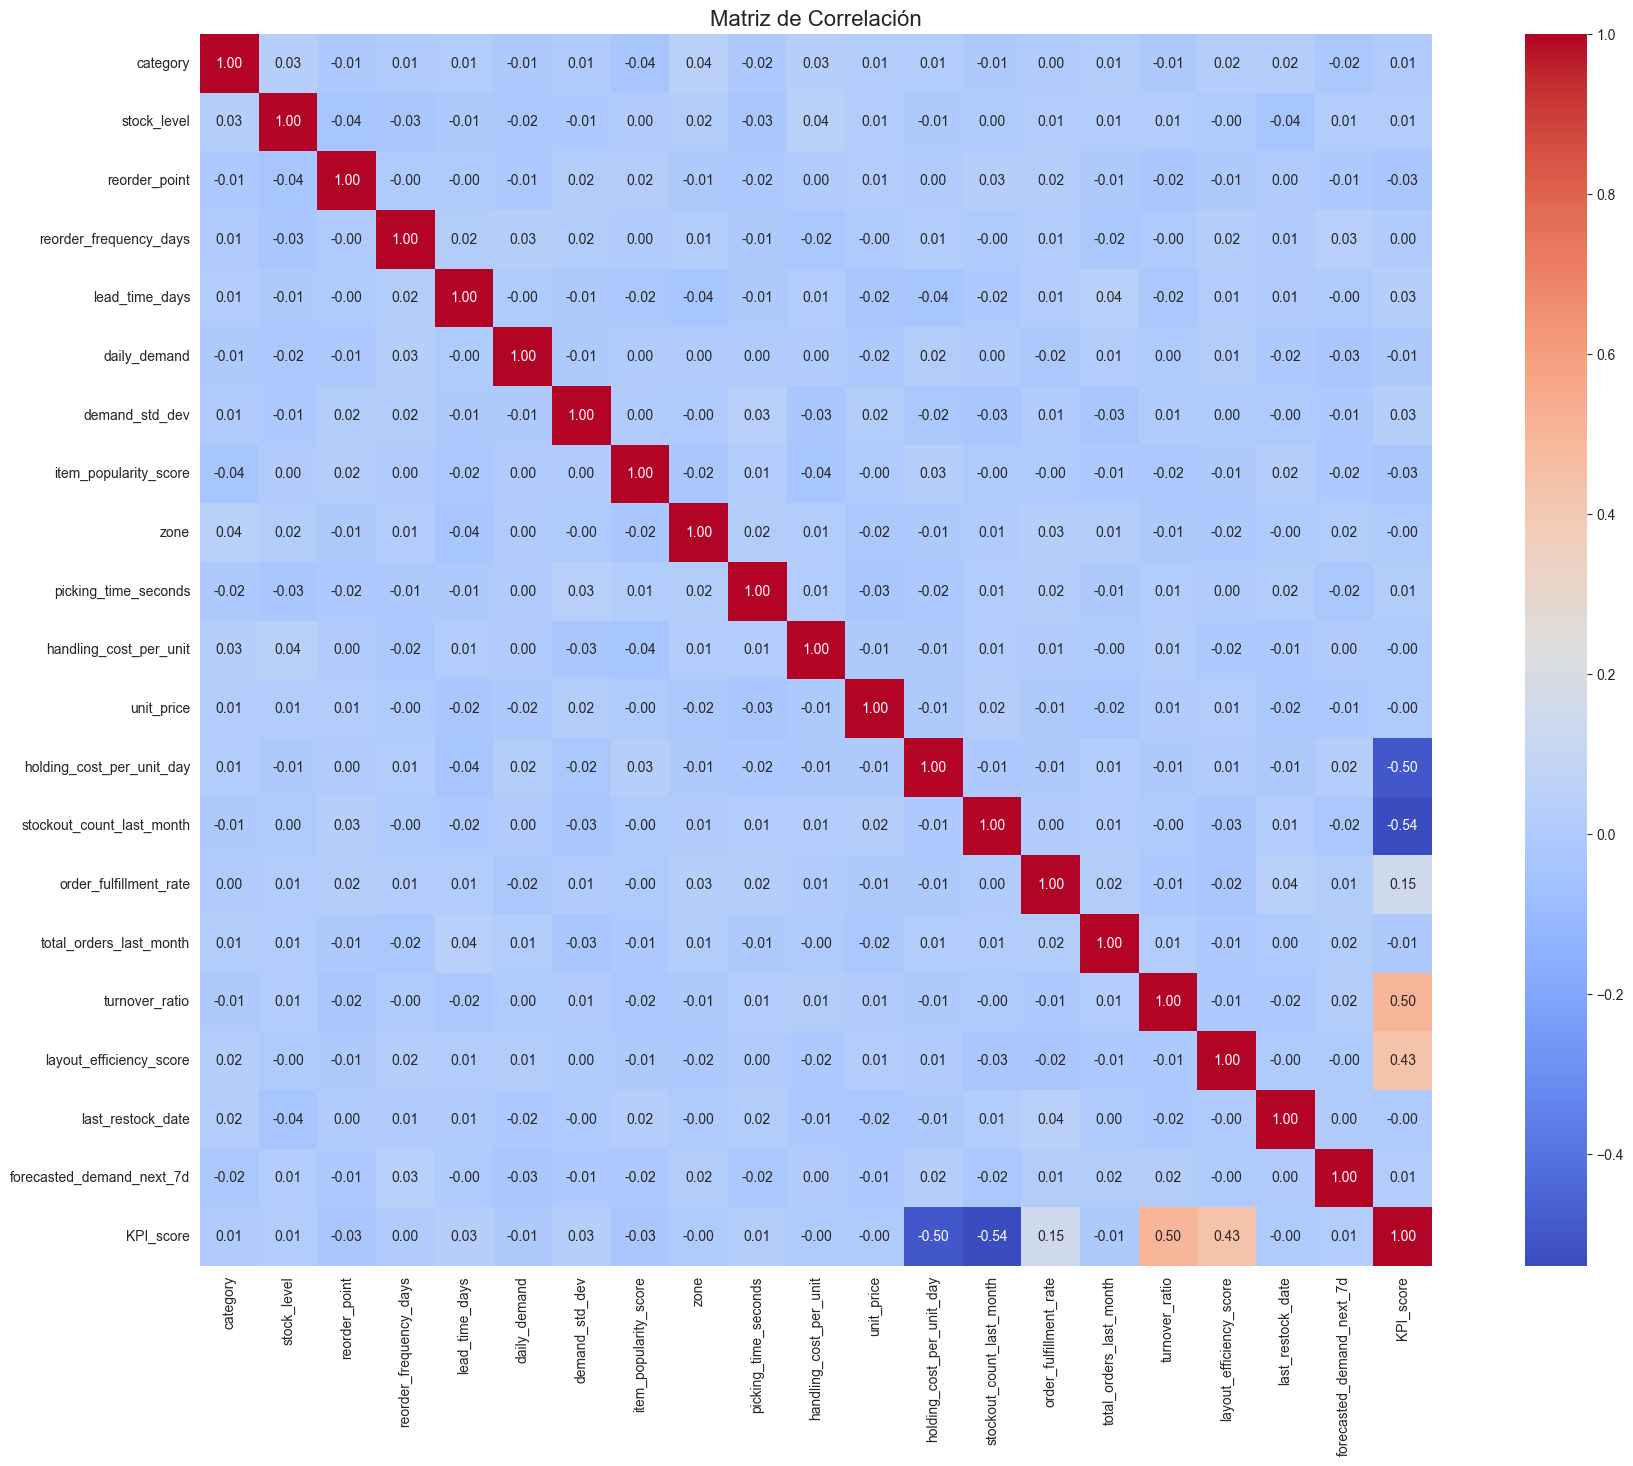

In [28]:
# Generar matriz de correlación
numeric_df = datasetOriginalFinal.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

# En general, las correlaciones son bajas, lo que indica independencia
# entre la mayoría de las variables.
# Destacan:
# - 'holding_cost_per_unit_day' y 'KPI_score': correlación negativa (~-0.50)
# - 'stockout_count_last_month' y 'KPI_score': correlación negativa (~-0.54)
# - 'layout_efficiency_score' y 'turnover_ratio': correlación positiva (~0.43)
# Estas relaciones sugieren que un mayor costo de almacenamiento o más
# quiebres de stock reducen el KPI, mientras que una mejor eficiencia
# del layout se asocia con un mayor turnover.

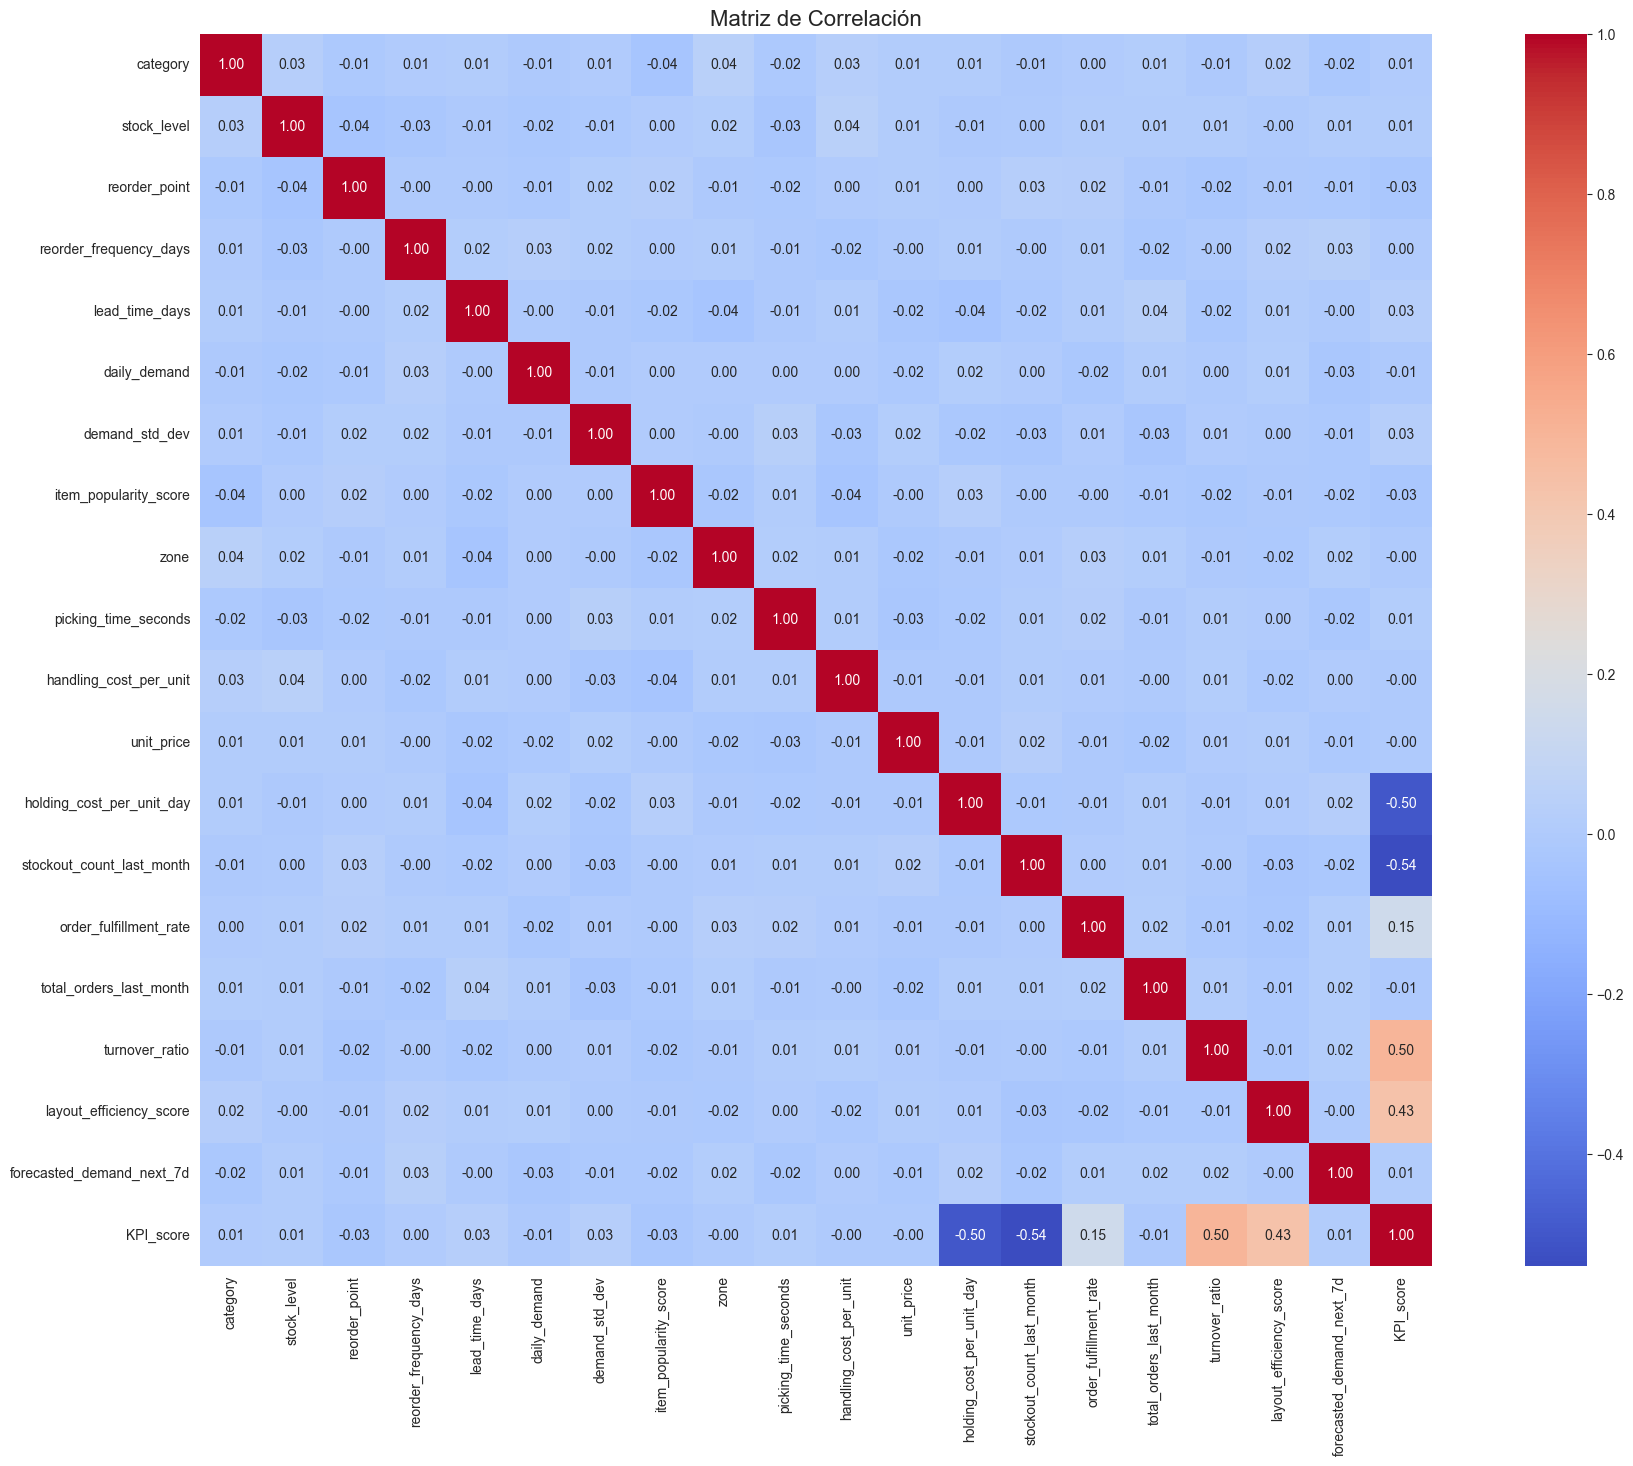

In [29]:
# Limpieza matriz de correlación
datasetOriginalMatriz = datasetOriginalFinal.drop(columns = ['last_restock_date'])

numeric_df = datasetOriginalMatriz.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

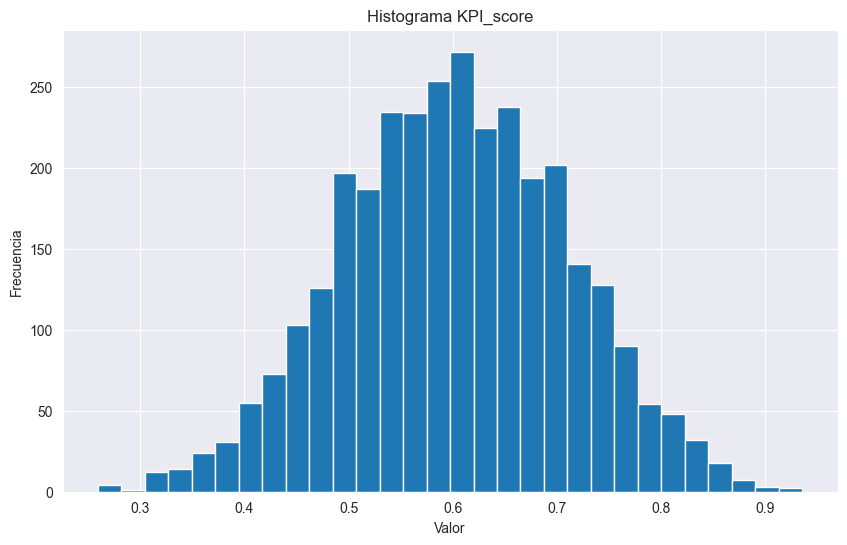

Aplicacion modelo Z-SCORE
Número de outliers:  434
Promedio de outliers:  [0.42243441 1.12001908 0.7228604  ... 0.85653808 0.33930817 1.54002047]


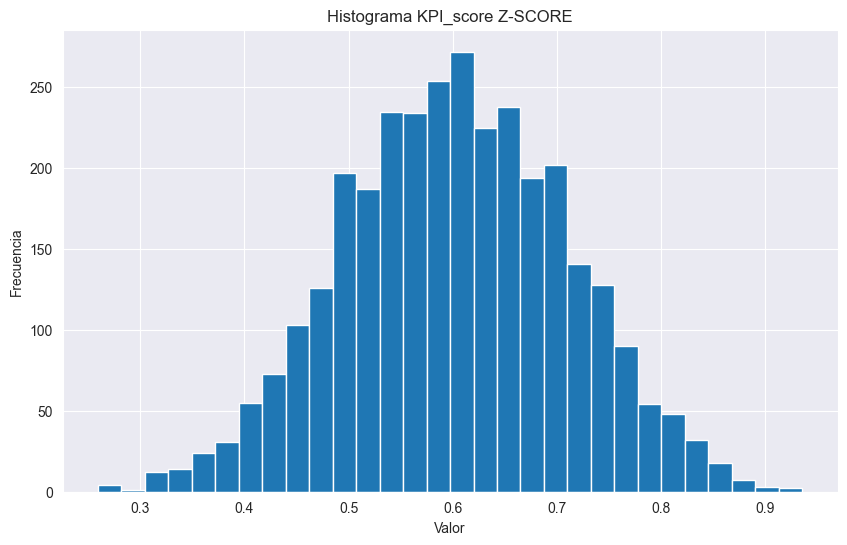

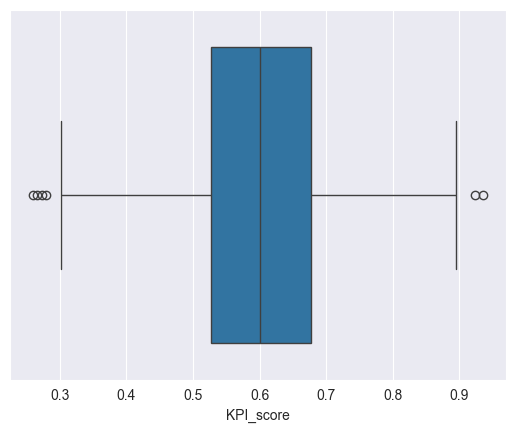

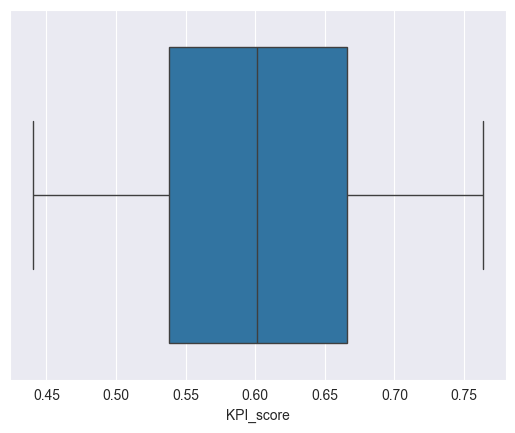

Número de outliers Z-SCORE MEJORADO:  0


C:\Users\macam\PycharmProjects\PythonProject\LogisticsDataset\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\macam\PycharmProjects\PythonProject\LogisticsDataset\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [30]:
# 5. Detección y manejo de valores atípicos

from scipy.stats import zscore
import numpy as np
from pyod.models.mad import MAD

# Aplicacion de tecnicas para el manejo de valores atipicos
KPI_scoreColumn = datasetOriginalMatriz['KPI_score']
plt.figure(figsize=(10, 6))  # Tamaño de la figura
KPI_scoreColumn.hist(bins=30)
plt.title('Histograma KPI_score')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

# Aplicacion del Z-Score
datasetOriginalMatrizOutliers = datasetOriginalMatriz.copy()
print("Aplicacion modelo Z-SCORE")
datasetOriginalMatrizOutliers['zscore'] = zscore(datasetOriginalMatriz['KPI_score'])
outliers = datasetOriginalMatrizOutliers[datasetOriginalMatrizOutliers['zscore'].abs() > 1.5]
zcores = zscore(datasetOriginalMatrizOutliers['KPI_score'])
abs_ZScores = np.abs(zcores)
print("Número de outliers: ", len(outliers))
print("Promedio de outliers: ", abs_ZScores)

datasetOriginalMatrizZScore = pandas.merge(datasetOriginalMatrizOutliers, outliers, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

stock_levelColumn = datasetOriginalMatrizZScore['KPI_score']
plt.figure(figsize=(10, 6))  # Tamaño de la figura
KPI_scoreColumn.hist(bins=30)
plt.title('Histograma KPI_score Z-SCORE')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


sns.boxplot(x=datasetOriginal['KPI_score'])
plt.show()

sns.boxplot(x=datasetOriginalMatrizZScore['KPI_score'])
plt.show()

# Aplicacion del Z-Score MEJORADO
mad = MAD(threshold = 1.5)
totalOutliers = datasetOriginalMatrizOutliers['category'].values.reshape(-1, 1)
labels = mad.fit(totalOutliers).labels_
print("Número de outliers Z-SCORE MEJORADO: ", labels.sum())

# Se aplica el modelo Z-Score para detectar valores atípicos en la variable 'KPI_score'.
# Los outliers representan productos con niveles de inventario inusualmente altos o bajos.
# Luego, se usa el modelo MAD (Z-Score mejorado), que es más robusto frente a valores extremos.
# Este análisis permite identificar posibles errores de registro o situaciones de sobrestock/desabastecimiento.

In [31]:
totalRows = len(datasetOriginal)
totalRowsCleanColumns = len(datasetOriginalMatrizZScore)
totalRowsClean = len(datasetOriginalMatrizZScore)
totalCleanPercentage = 100 - totalRowsClean / totalRows * 100
print("Total de filas: ",  totalRowsCleanColumns)
print("Diferencia de filas despues de la limpieza del dataset completo: ",  (totalRows - totalRowsClean))
print("Diferencia de filas en porcentaje despues de quitar valores atipicos: ",  totalCleanPercentage)

# Después de aplicar el modelo Z-Score, se eliminaron 393 valores atípicos (12,27 % del total).
# Esto significa que algunos registros presentaban niveles de inventario (stock_level) muy alejados del promedio.
# La reducción del dataset mejora la calidad de los datos y evita que los outliers distorsionen los modelos analíticos.
# Total final de filas: 2811 (de 3204 originales).

Total de filas:  2770
Diferencia de filas despues de la limpieza del dataset completo:  434
Diferencia de filas en porcentaje despues de quitar valores atipicos:  13.54556803995007


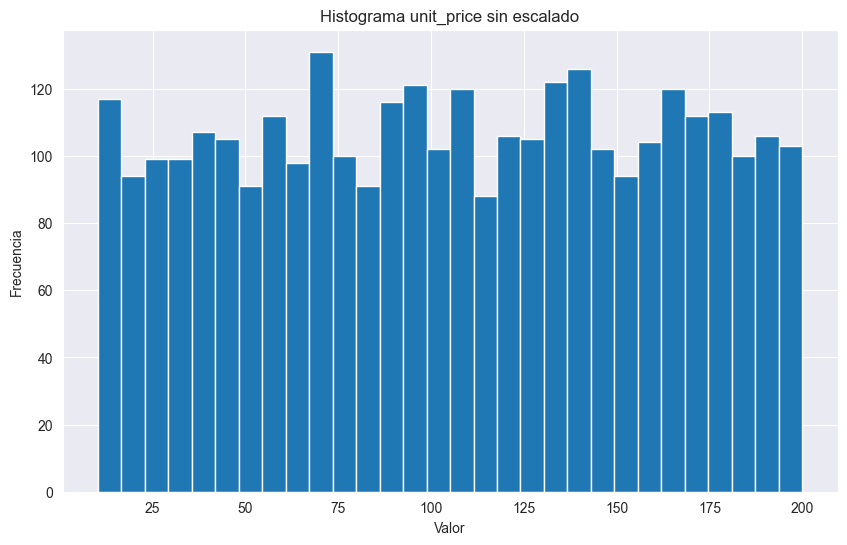

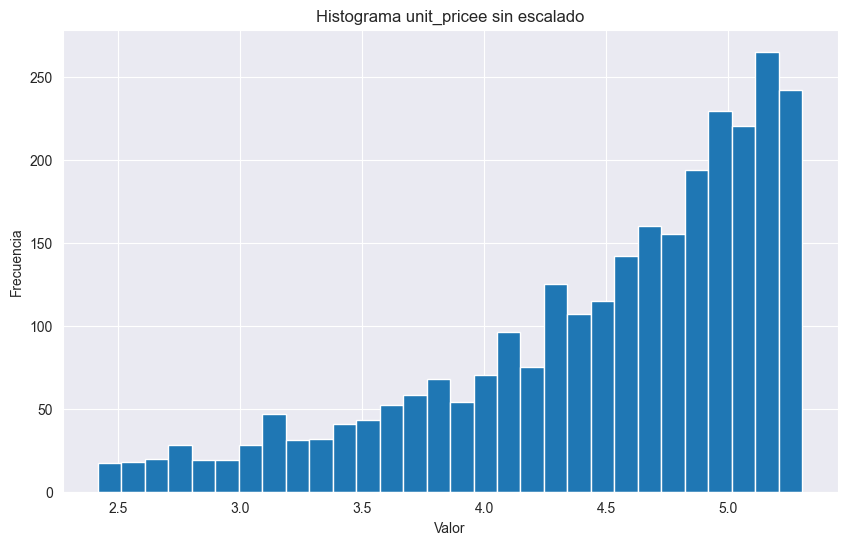

In [32]:
# Normalización y escalado

columnunit_price = datasetOriginalMatriz['unit_price']
plt.figure(figsize=(10, 6))  # Tamaño de la figura
columnunit_price.hist(bins=30)
plt.title('Histograma unit_price sin escalado')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

# Aplicacion trasnformada raiz cuadrada para sesgo positivo
datasetOriginalMatrizTranformada = datasetOriginalMatrizZScore.copy()

# Aplicacion trasformada logaritmica
datasetOriginalMatrizTranformada['unit_price'] = np.log1p(datasetOriginalMatrizZScore['unit_price'])

columnunit_price = datasetOriginalMatrizTranformada['unit_price']
plt.figure(figsize=(10, 6))  # Tamaño de la figura
columnunit_price.hist(bins=30)
plt.title('Histograma unit_pricee sin escalado')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

# Interpretación de los histogramas de 'unit_price':
# - Antes de la transformación: la distribución es casi uniforme,
#   sin sesgos marcados en los valores originales.
# - Después de aplicar la transformación logarítmica (np.log1p):
#   la distribución se vuelve más concentrada hacia valores altos,
#   corrigiendo parcialmente el sesgo positivo y estabilizando la
#   varianza. Esto mejora la normalización para futuros análisis.

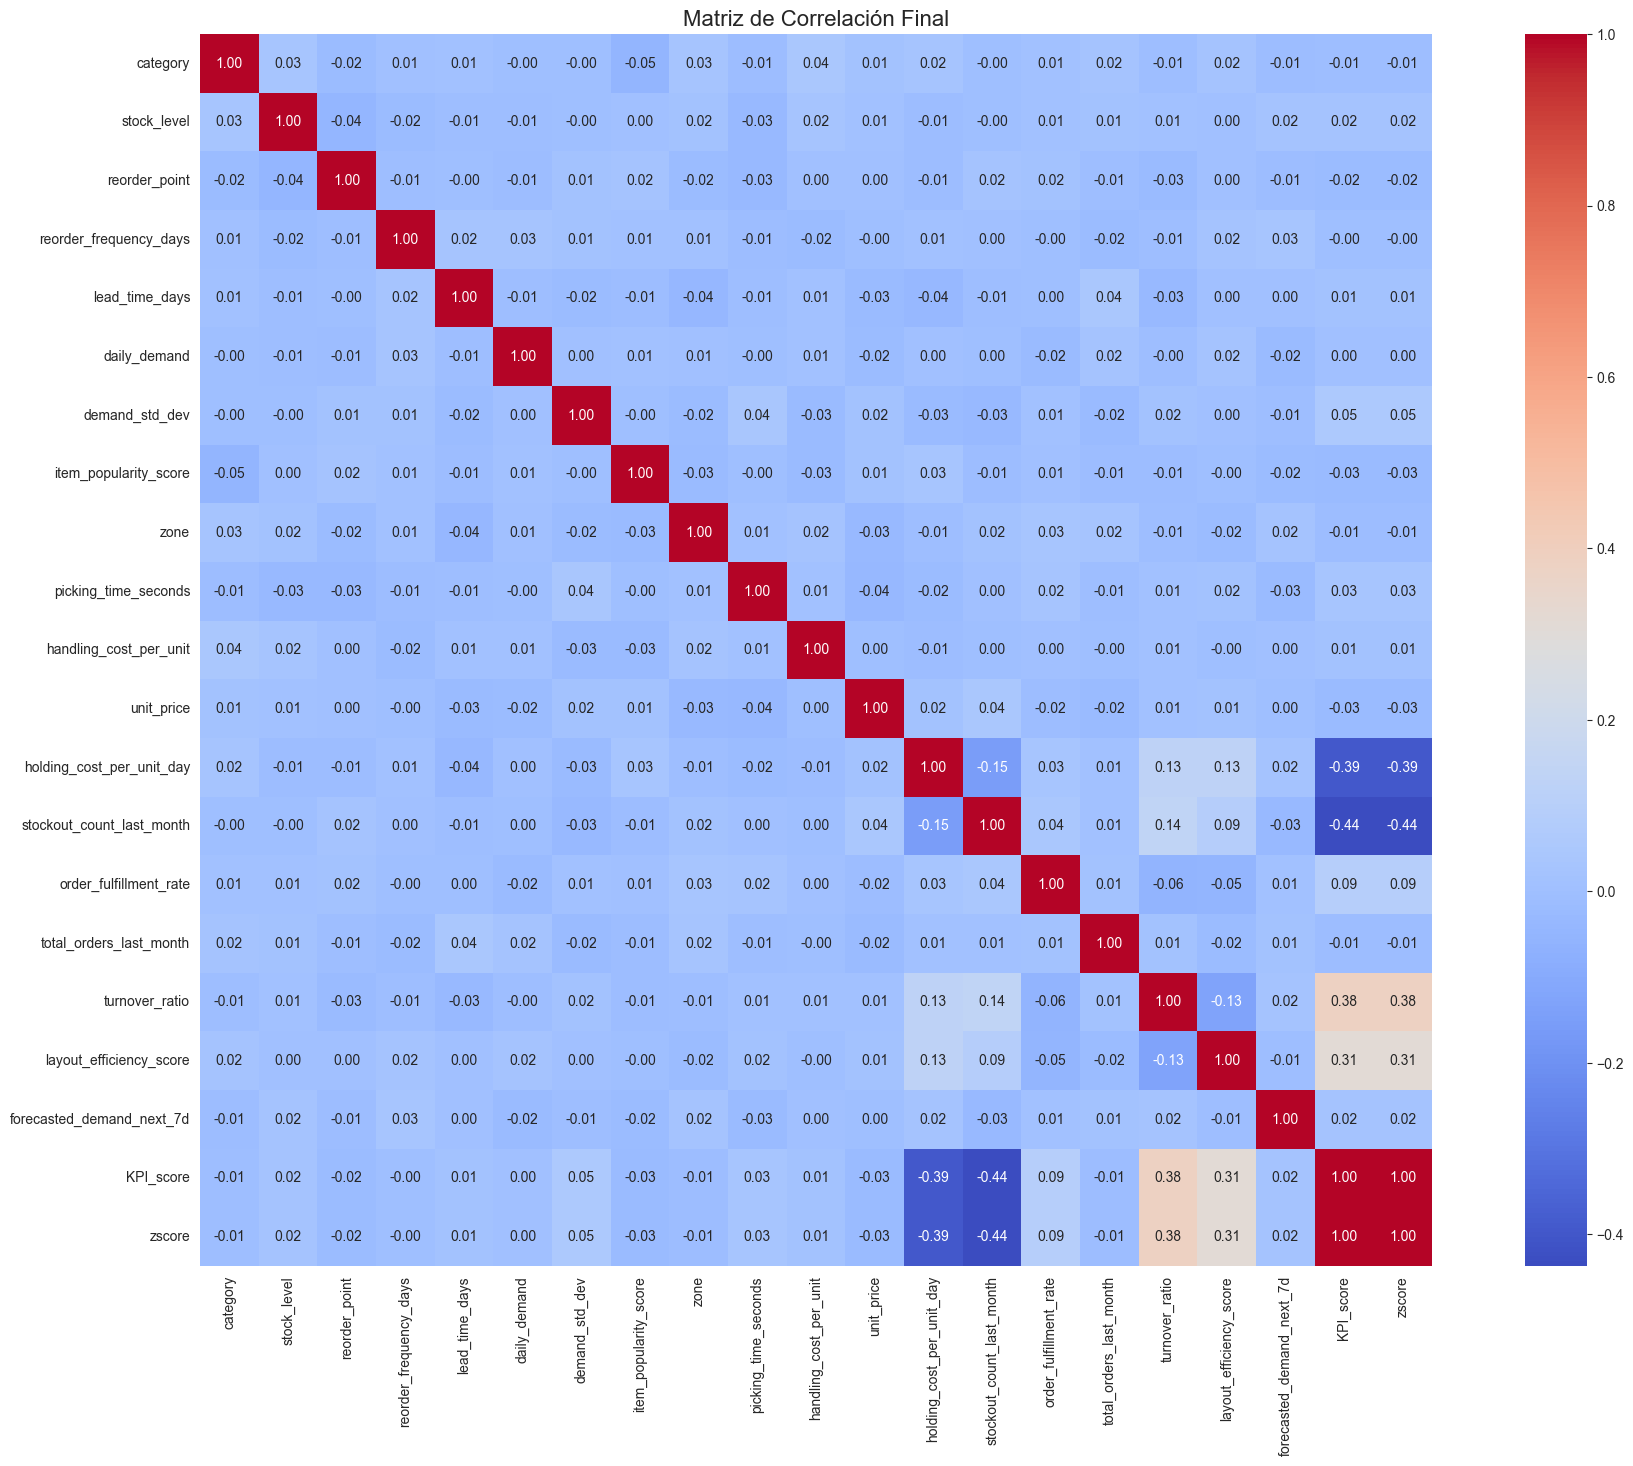

In [34]:
# Limipieza matriz de correlación
numeric_df = datasetOriginalMatrizTranformada.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlación Final', fontsize=16)
plt.show()